# Data Analysis Assignment 2
**Due Date:** December 8, 2024, 23:59  
**Total Points:** 114 + 15 bonus points

## Copyright and Fair Use

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

## Guidelines

1. **DO NOT add or delete any cells (or modify cell IDs)**
2. Complete code cells marked with `# YOUR CODE HERE`
3. Comment or remove lines with `raise NotImplementedError()`
4. Run all cells before submission to verify your solutions
5. Submit Notebook (.ipynb file) on Moodle with filename using the correct format, e.g., **Assignment_2_JohnDoe_12345678.ipynb**

<div style="background-color: #e6f3ff; padding: 15px; margin: 10px; border-left: 5px solid #2196F3; border-radius: 3px;">
In this assignment, we will apply the preprocessing and analysis techniques demonstrated in the last exercise to a different real-world dataset. While the previous exercise focused on sensor measurements (temperature, humidity, etc.), this time we'll analyze system performance metrics. The preprocessing steps will be similar - handling invalid data, removing outliers, dealing with missing values - but adapted to the characteristics of system performance data. Just as we previously identified patterns in sensor behavior, here we'll look for patterns in system behavior that could indicate test system anomalies. Understanding the daily/nightly testing cycles will be crucial for identifying abnormal states, much like how we analyzed daily patterns in the sensor data.
</div>

# System Performance Analysis

## Background
This assignment analyzes performance data from test systems that perform nightly testing of industrial network devices (switches and routers) at Westermo. These test systems validate devices used in critical applications like energy distribution and railway systems.

When tests fail, the cause could be:
1. Actual issues with the software under test
2. Problems in the test framework code
3. Hardware setup issues (e.g., wrong cable connections, unpowered devices)
4. Server issues (e.g., full disk)

The key question is: "If the test system is in an abnormal state – can we trust the test results?"

### The Dataset
The complete dataset consists of 19 CSV files (one per test system), each containing:
- About 86,000 samples
- Collected over one month
- Sampled twice per minute
- Over 20 performance metrics

Data accessibility and further information: https://github.com/westermo/test-system-performance-dataset

**Note:** If you would like to learn more about the dataset, read through the attached pdf file, and check out the dataset link above

### Focus of Our Analysis
For this assignment, we'll analyze one test system focusing on these key metrics:

1. **System Load (load-15m)**
   - 15-minute average of system workload
   - Shows test execution patterns
   - Peaks during night testing, low during day

2. **Memory Usage (memory_used_pct)**
   - Percentage of total memory used
   - Calculated from available/total memory
   - Indicates resource utilization

3. **CPU Usage (cpu-user)**
   - Rate of change in seconds spent on user processes
   - Shows changes in processing activity
   - Higher values indicate increasing CPU time use

4. **Temperature Change (sys-thermal)**
   - Rate of change in system temperature
   - Optional metric (not on all systems)
   - Helps detect system stress

5. **Server Status (server-up)**
   - System heartbeat indicator
   - Values > 0 show server availability
   - Critical for validating system operation


In [1]:
# Initial setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Configure plotting
plt.rcParams.update({
    'figure.figsize': [12, 8],
    'figure.dpi': 150,
    'figure.autolayout': True,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'font.size': 12
})

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

np.random.seed(42)

KeyboardInterrupt: 


## Task 1.1: Data Loading and Preparation (10 points)

Create a function that loads and prepares the system performance data. Your function should:

1. Load the data file
2. Convert Unix timestamps to datetime
3. Calculate memory usage percentage
4. Drop unneeded columns 

Example data structure (original):
```
timestamp   load-15m   sys-mem-available   sys-mem-total   cpu-user   sys-thermal
30           0.85       8589934592          16777216000     0.0475       1.4
```

Hint:
```python
def load_system_data(file_path):
    # Read CSV
    df = pd.read_csv(file_path)
    
    # Convert timestamp
    df['datetime'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')

    #set index to datetime
    df.set_index('datetime', inplace=True)
    
    # Calculate memory usage
    df['memory_used_pct'] = (1 - df['sys-mem-available']/df['sys-mem-total']) * 100
    
    return df
```

In [ ]:
def load_system_data(file_path: str) -> pd.DataFrame:
    """Load and prepare test system performance data.
    
    Parameters
    ----------
    file_path : str
        Path to the CSV data file
        
    Returns
    -------
    pd.DataFrame
        Processed dataframe with columns:
        - datetime: Timestamp (index)
        - load-15m: 15-minute load average
        - memory_used_pct: Calculated memory usage
        - cpu-user: Rate of change in CPU time
        - sys-thermal: Temperature change
        - server-up: System availability
    """
    # YOUR CODE HERE

    df = pd.read_csv(file_path, delimiter = ",",usecols=["timestamp","load-15m","sys-mem-available","sys-mem-total","cpu-user","sys-thermal","server-up"]) # Read in data with columns
    

    
    df['datetime'] = pd.to_datetime(df['timestamp'], unit = 's', errors = 'coerce') # Create datetime from timestamp
    
    df.set_index('datetime',inplace=True) # Set datetime as index

    df['memory_used_pct'] = (1 - df['sys-mem-available']/df['sys-mem-total']) * 100 # Memory usage calculation
    df.drop(["timestamp","sys-mem-available","sys-mem-total"], axis=1, inplace=True) # Drop unneccessary data
    
   
    return df
    

load_system_data("system-1.csv")

load-15m  sys-thermal  cpu-user  server-up  \
datetime                                                          
1970-01-01 00:00:00      0.18         1.60    0.0405          2   
1970-01-01 00:00:30      0.18         0.00    0.0475          2   
1970-01-01 00:01:00      0.18         0.00    0.0260          2   
1970-01-01 00:01:30      0.18         0.00    0.0315          2   
1970-01-01 00:02:00      0.17         1.55    0.0270          2   
...                       ...          ...       ...        ...   
1970-01-30 23:58:00      0.10         1.40    0.0340          2   
1970-01-30 23:58:30      0.10         0.05    0.0425          2   
1970-01-30 23:59:00      0.09         0.00    0.0330          2   
1970-01-30 23:59:30      0.09         1.45    0.0330          2   
1970-01-31 00:00:00      0.10         0.00    0.0760          2   

                     memory_used_pct  
datetime                              
1970-01-01 00:00:00         8.005350  
1970-01-01 00:00:30         7.995124  
1970-01-01 00:01:00         8.001982  
1970-01-01 00:01:30         8.001884  
1970-01-01 00:02:00         8.001712  
...                              ...  
1970-01-30 23:58:00         9.010920  
1970-01-30 23:58:30         9.006003  
1970-01-30 23:59:00         9.010944  
1970-01-30 23:59:30         9.007798  
1970-01-31 00:00:00         7.182055  

[85749 rows x 5 columns]

In [ ]:
# Test cell (simply run it)
df = load_system_data('system-1.csv')

# Check required columns
required_cols = ['load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal', 'server-up']
assert all(col in df.columns for col in required_cols), "Missing required columns"
assert isinstance(df.index, pd.DatetimeIndex), "Index should be datetime"
assert df['memory_used_pct'].between(0, 100).all(), "Memory usage should be percentage"
print("Basic data structure tests passed!")

print("Data Overview:")
print(f"Time range: {df.index.min()} to {df.index.max()}")
print(f"Number of samples: {len(df):,}")
print("\nFirst few rows:")
print(df.head())

Basic data structure tests passed!
Data Overview:
Time range: 1970-01-01 00:00:00 to 1970-01-31 00:00:00
Number of samples: 85,749

First few rows:
                     load-15m  sys-thermal  cpu-user  server-up  \
datetime                                                          
1970-01-01 00:00:00      0.18         1.60    0.0405          2   
1970-01-01 00:00:30      0.18         0.00    0.0475          2   
1970-01-01 00:01:00      0.18         0.00    0.0260          2   
1970-01-01 00:01:30      0.18         0.00    0.0315          2   
1970-01-01 00:02:00      0.17         1.55    0.0270          2   

                     memory_used_pct  
datetime                              
1970-01-01 00:00:00         8.005350  
1970-01-01 00:00:30         7.995124  
1970-01-01 00:01:00         8.001982  
1970-01-01 00:01:30         8.001884  
1970-01-01 00:02:00         8.001712  


## Task 1.2: Raw Data Overview Visualization (30 points)

Create a comprehensive visualization of the system metrics following the style in Unit2. You are free to adapt and add more plots, however, your visualization should atleast include:

1. **Time Series Overview** (5 points)
   - Show all metrics over time
   - Highlight server availability status
   - Use appropriate alpha and line width
   - Add proper labels

2. **Daily Distribution** (5 points)
   - Create boxplots by hour
   - Show daily patterns
   - Consider server uptime periods
   
3. **Correlation Analysis** (5 points)
   - Create correlation matrix between metrics\
     (Use seaborn heatmap visualization) 

4. **Relationship Visualization** (5 points)
   - Scatter plot of key metrics
   - Hexbin plot for dense areas
   - Color scatter points by server status
     
5. **Layout and Formatting** (5 points)
    - Clear titles and labels
    - Appropriate color schemes
   
Hints for visualizations:
```python
# Correlation heatmap
corr_matrix = df[['load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal', 'server-up']].corr()
sns.heatmap(corr_matrix,
            annot=True,      # Show correlation values
            cmap='coolwarm', # Diverging colormap
            center=0,        # Center colormap at 0
            fmt='.2f',       # Format coefficients
            ax=axes[1, 0])
axes[1, 0].set_title('Metric Correlations')

# Scatter plot with server status
scatter = axes[1, 1].scatter(df['cpu-user'], df['memory_used_pct'],
                           c=df['server-up'],  # Color by status
                           cmap='RdYlGn',      # Red-Yellow-Green
                           alpha=0.5)          
plt.colorbar(scatter, ax=axes[1, 1], label='Server Status')
axes[1, 1].set_xlabel('CPU Time Rate of Change (seconds)') 
axes[1, 1].set_title('CPU Time vs Memory Usage')        

# Hexbin for density
df.plot.hexbin(x='load-15m', y='cpu-user',
               gridsize=20,
               cmap='YlOrRd',
               ax=axes[2, 0])
axes[2, 0].set_title('Load vs CPU Usage Density')
```

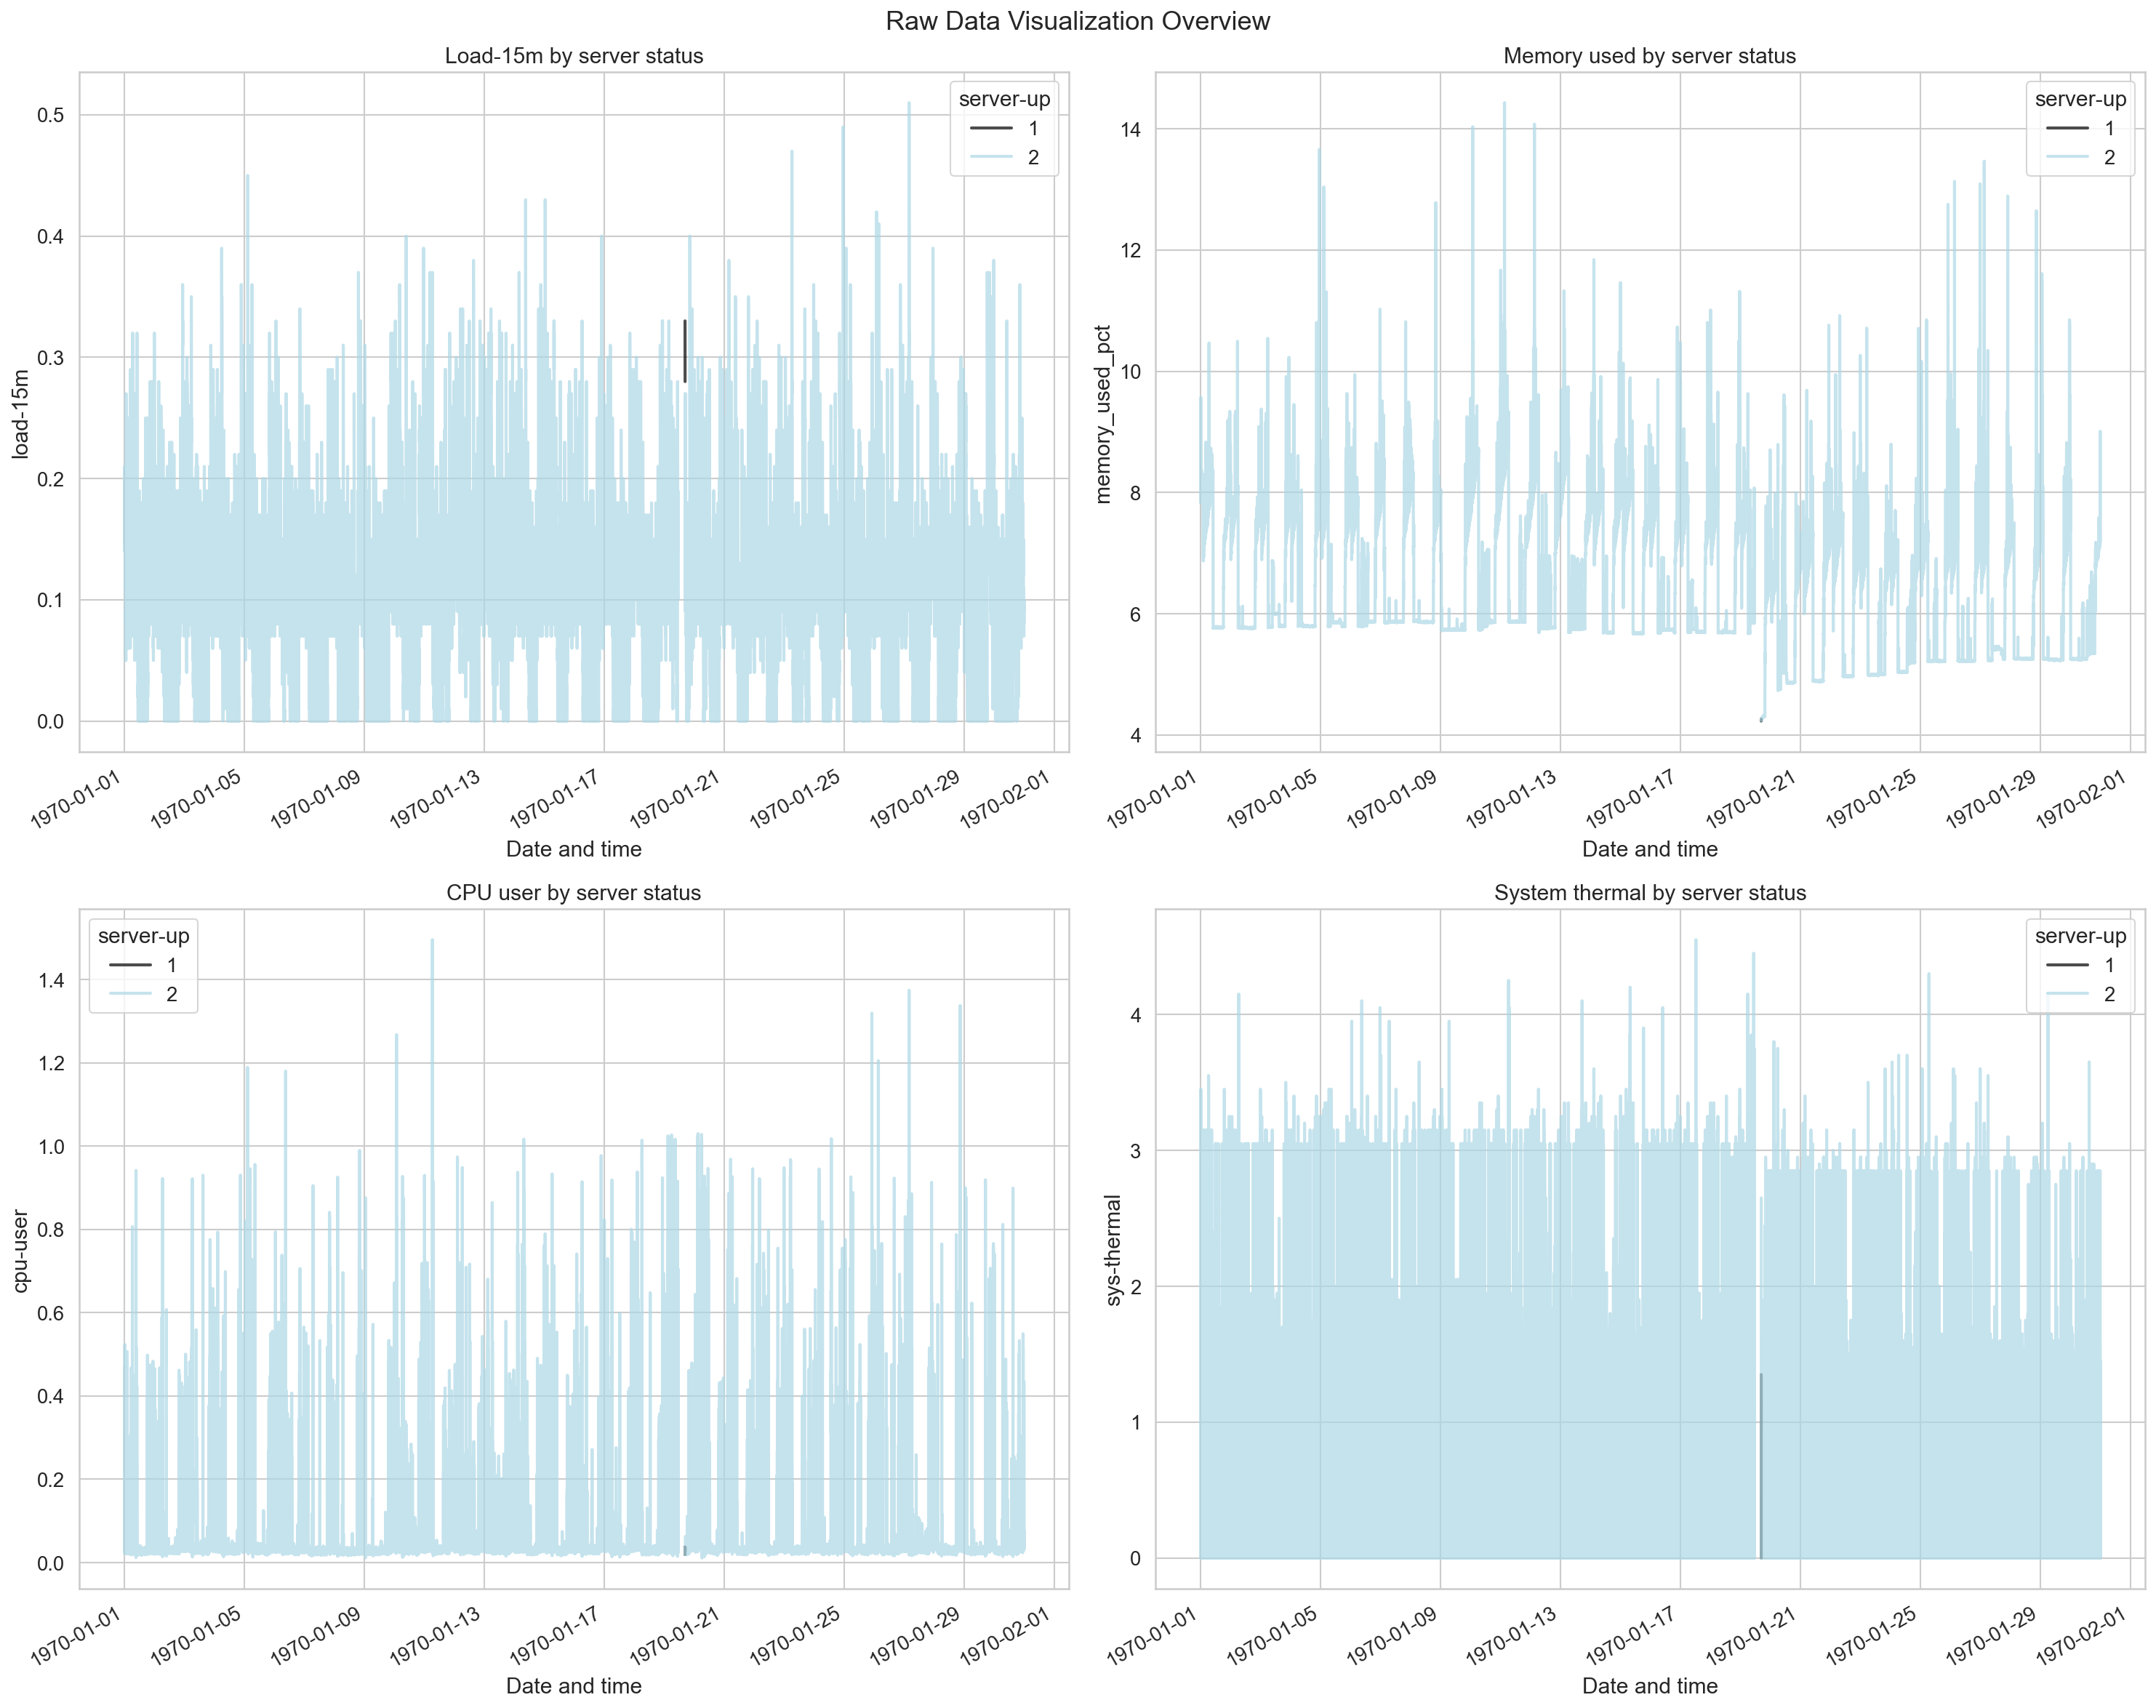

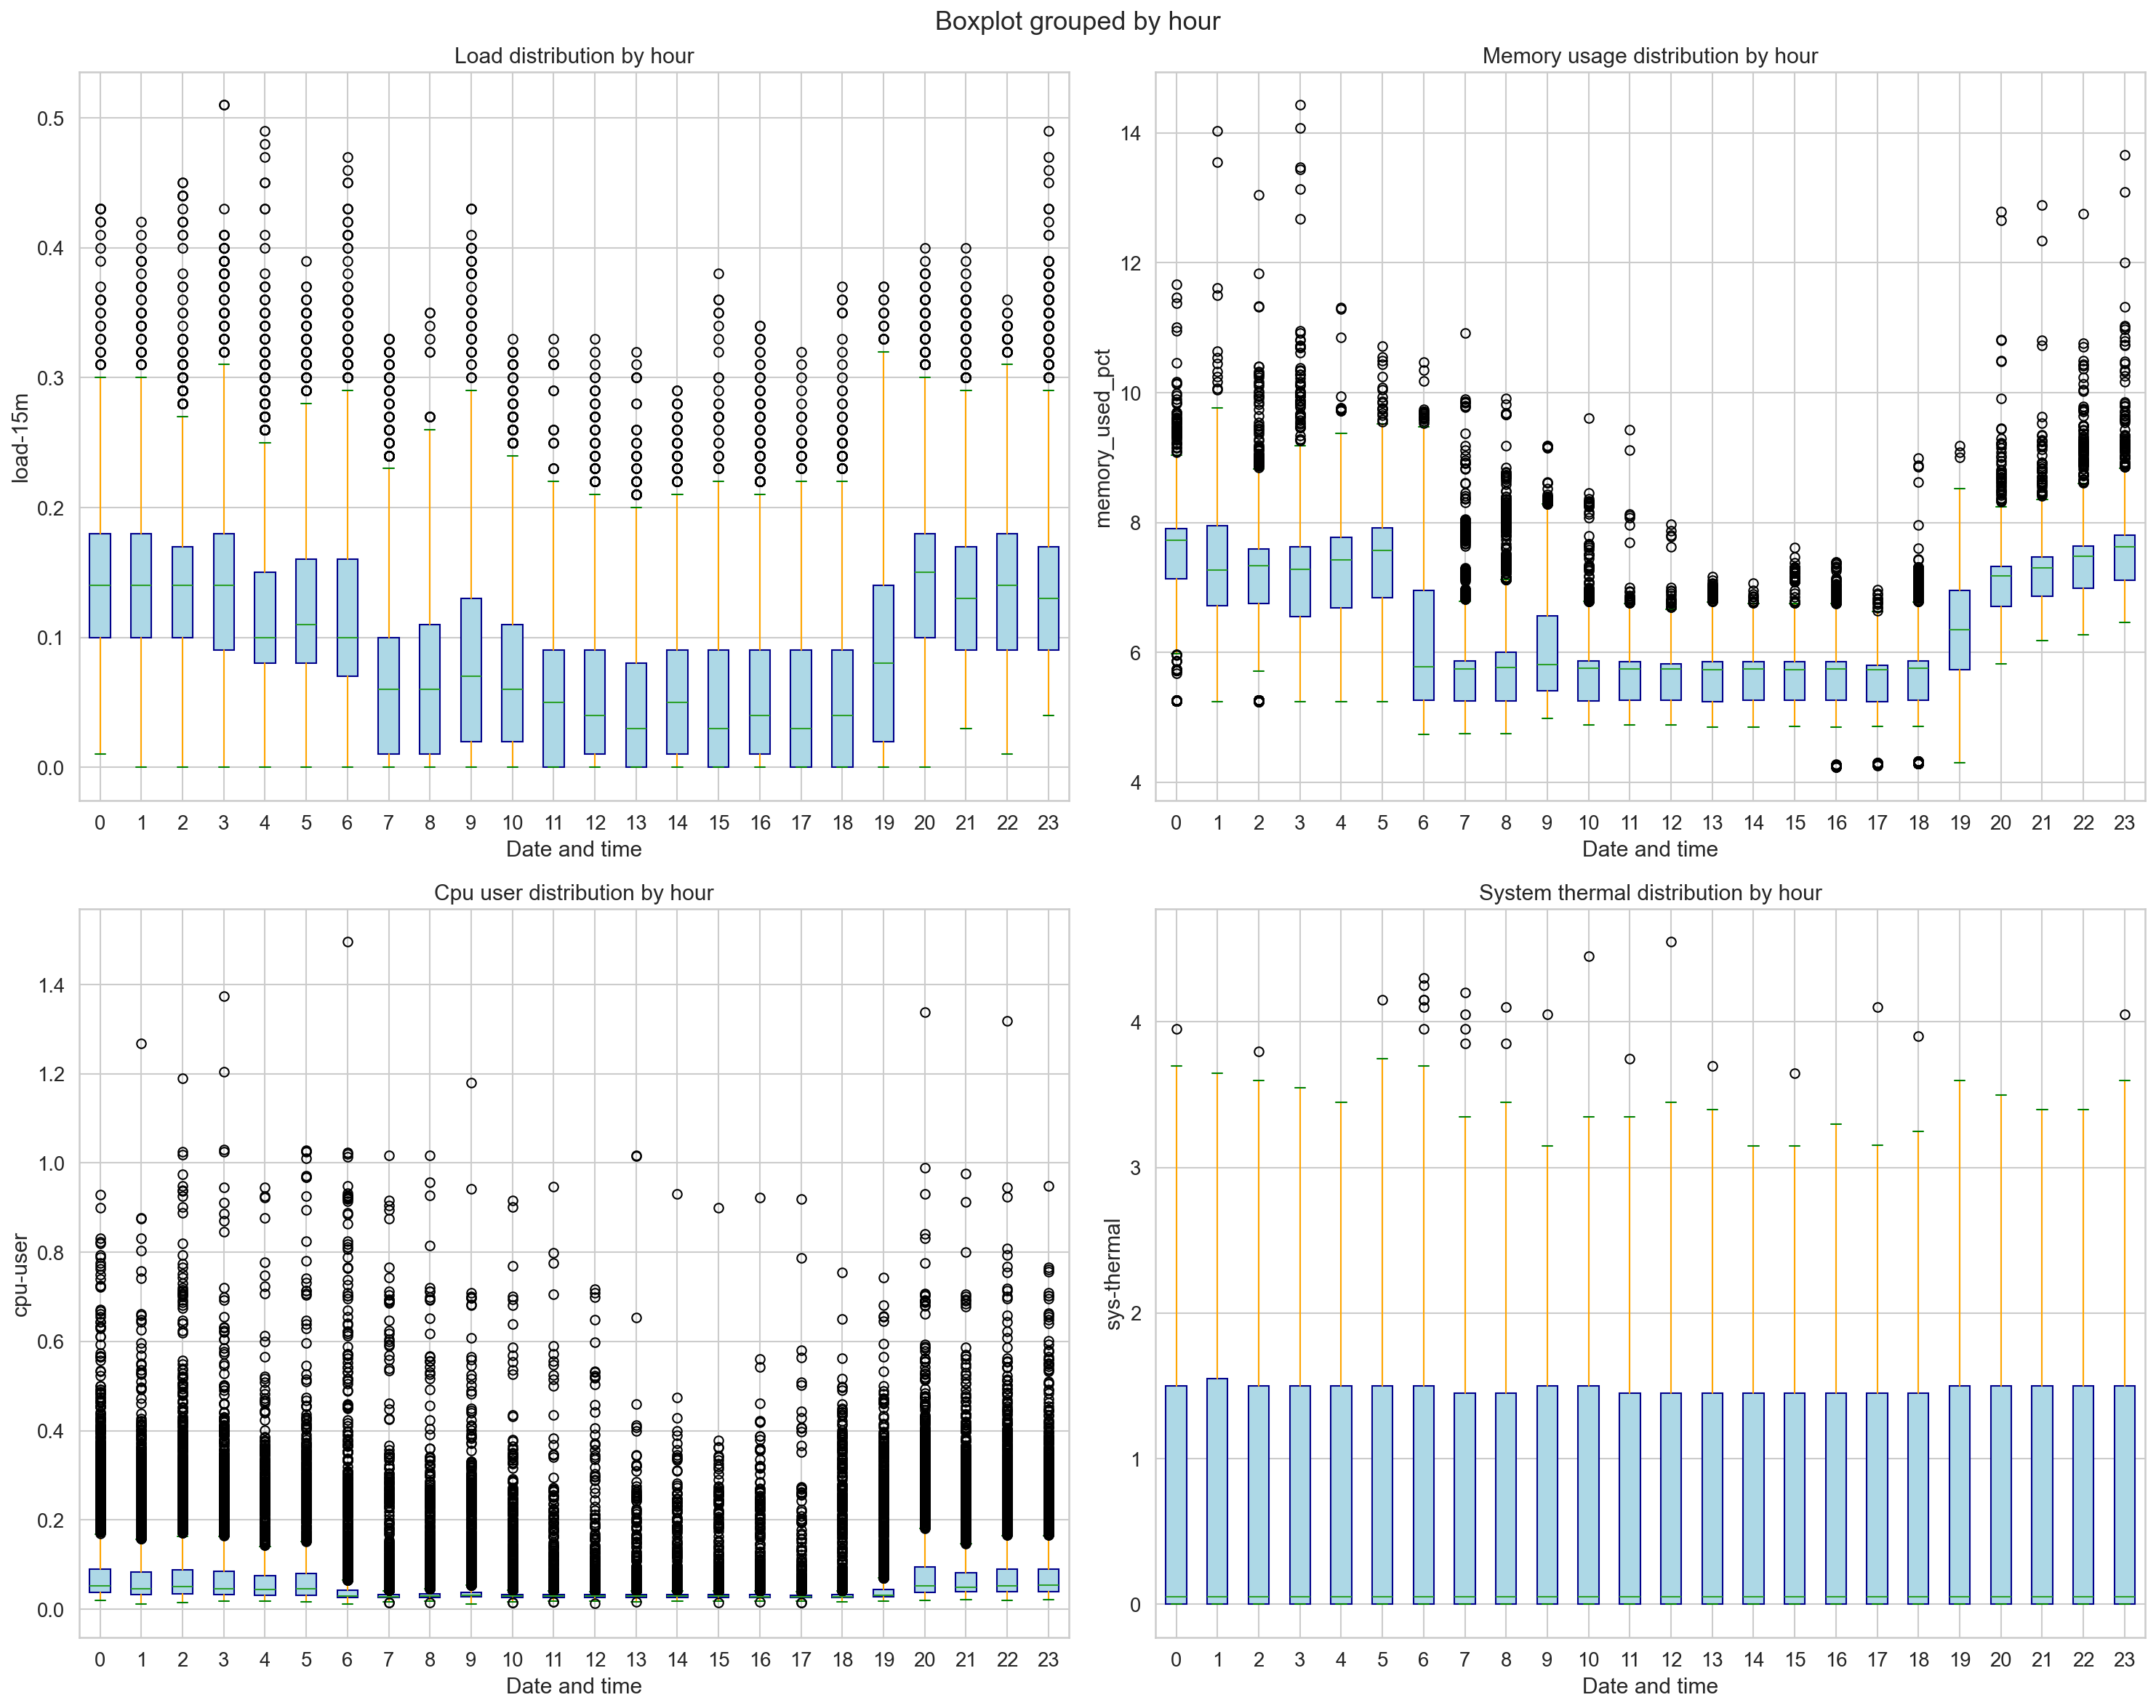

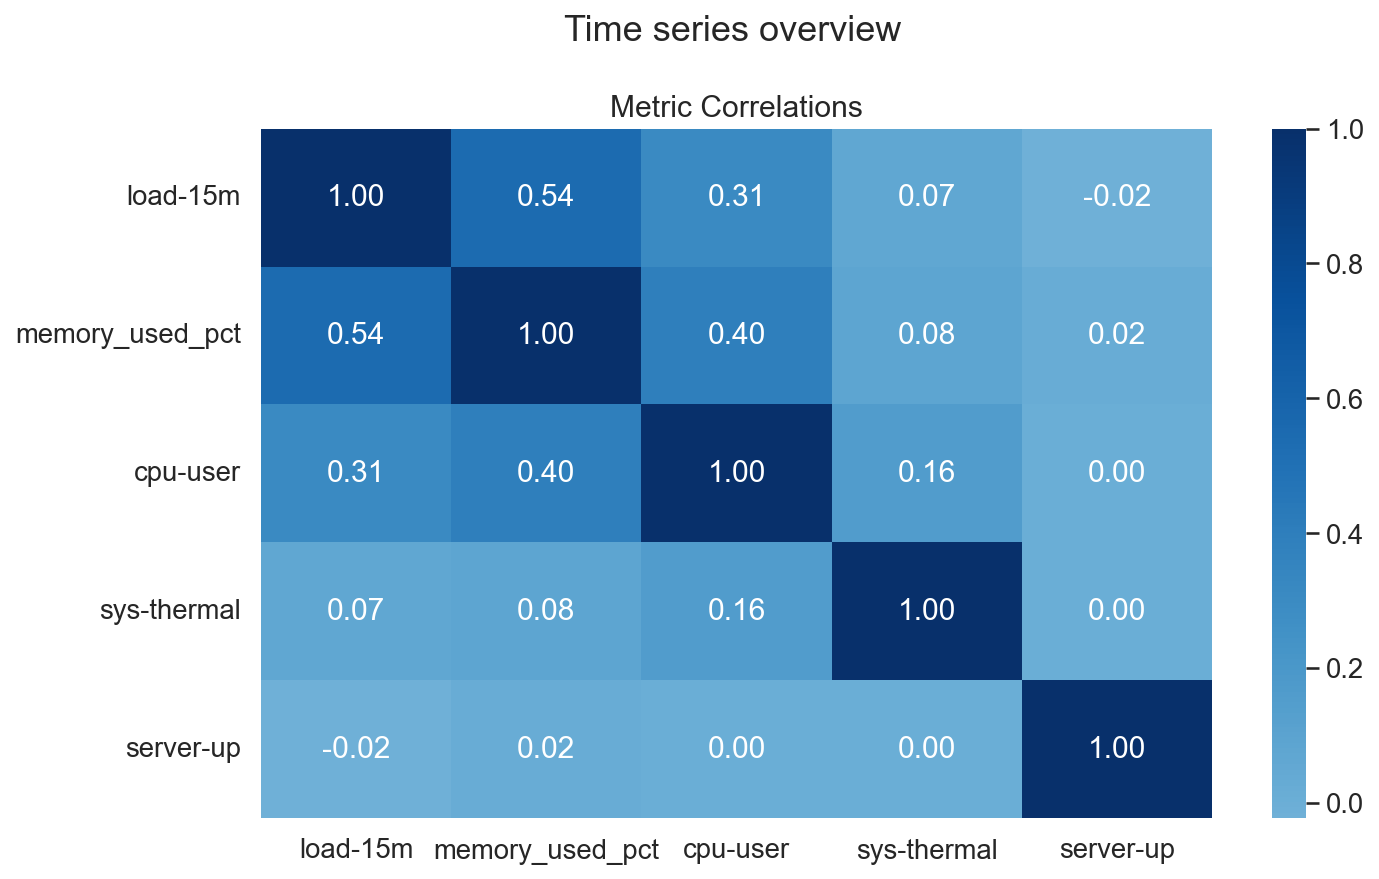

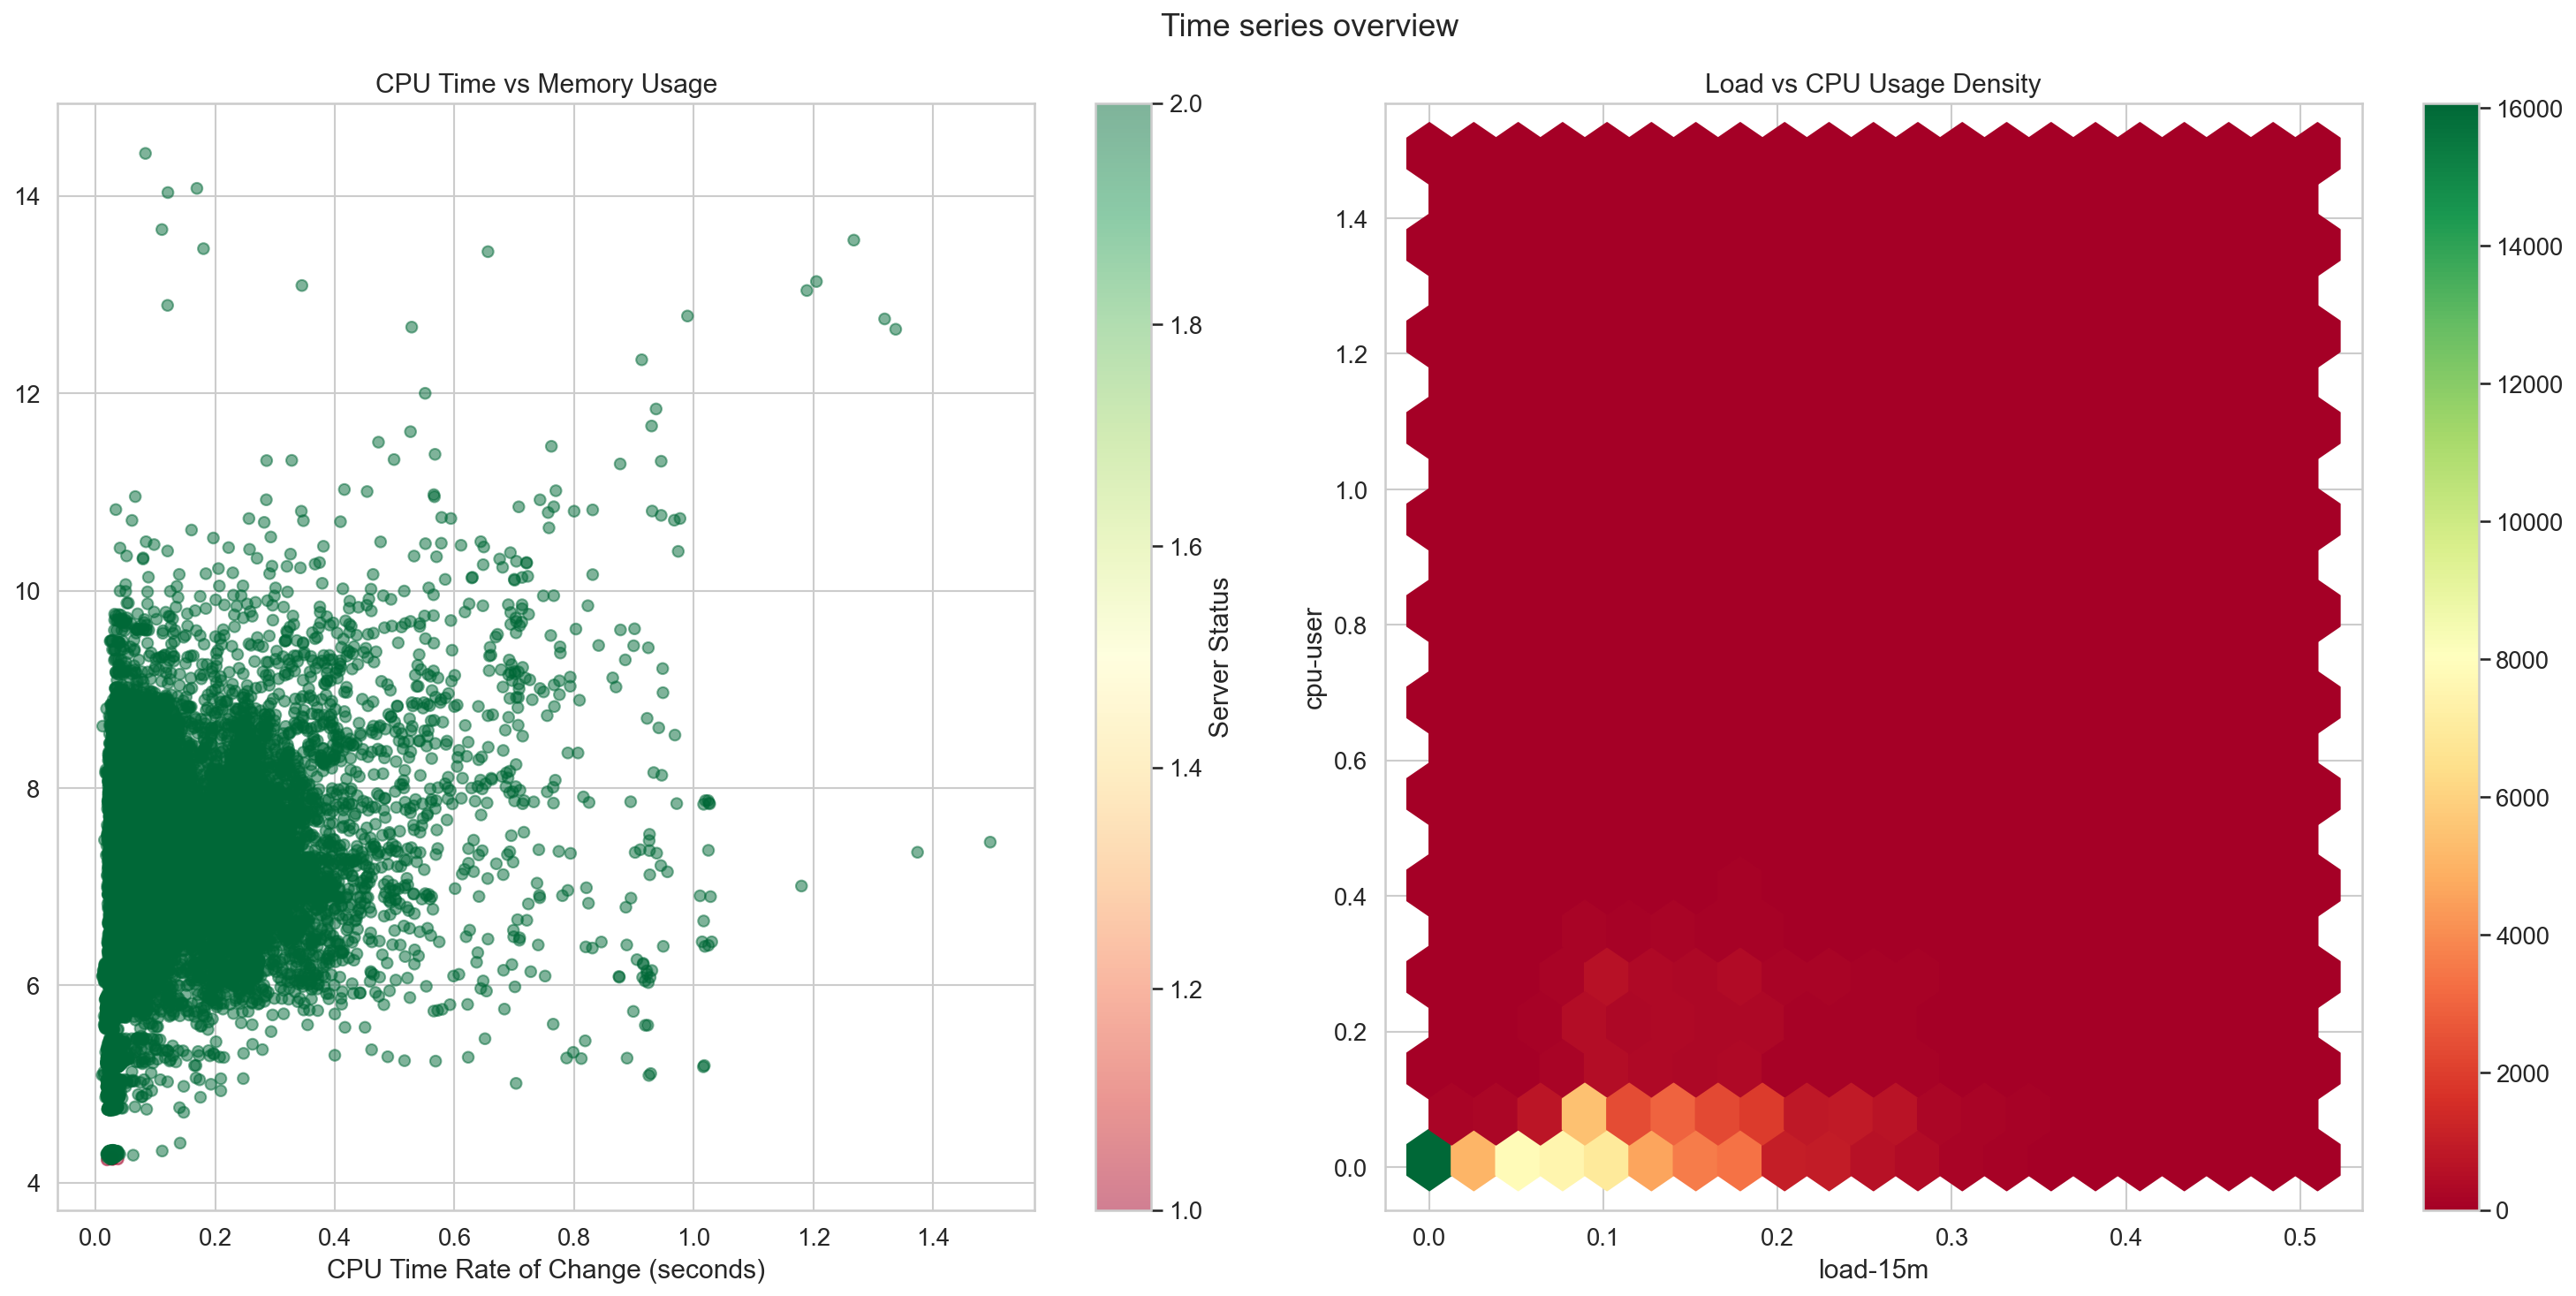

In [ ]:
# YOUR CODE HERE


# Time series overview
fig1, axes = plt.subplots(2,2, figsize=(20,16))
fig1.suptitle("Raw Data Visualization Overview")

df.pivot(columns='server-up', values='load-15m').plot(
    ax=axes[0, 0],
    legend=True, 
    alpha=0.7, 
    linewidth=2,
    color=['black','lightblue'],
    xlabel="Date and time",
    ylabel="load-15m",
    title="Load-15m by server status"
)

df.pivot(columns='server-up', values='memory_used_pct').plot(
    ax=axes[0, 1],
    legend=True, 
    alpha=0.7,
    linewidth=2,
    color=['black','lightblue'],
    xlabel="Date and time",
    ylabel="memory_used_pct" ,
    title="Memory used by server status"
)

df.pivot(columns='server-up', values='cpu-user').plot(
    ax=axes[1, 0],
    legend=True,
    alpha=0.7, 
    linewidth=2,
    color=['black','lightblue'],
    xlabel="Date and time",
    ylabel="cpu-user",
    title="CPU user by server status"
)

df.pivot(columns='server-up', values='sys-thermal').plot(
    ax=axes[1, 1],
    legend=True, 
    alpha=0.7, 
    linewidth=2,
    color=['black','lightblue'],
    xlabel="Date and time",
    ylabel="sys-thermal",
    title="System thermal by server status"
)

# Daily distribution                                    
fig2, axes1 = plt.subplots(2,2, figsize=(20,16))
fig2.suptitle("Time series overview")

df['hour'] = df.index.hour
df.boxplot(
    column='load-15m',
    by='hour',
    ax=axes1[0, 0],
    xlabel="Date and time",
    ylabel="load-15m",
    patch_artist=True, # Just to customize plots
    boxprops=dict(facecolor='lightblue', color='darkblue'),
    whiskerprops=dict(color='orange'),
    capprops=dict(color='green')
)
axes1[0, 0].set_title('Load distribution by hour')

df['hour'] = df.index.hour
df.boxplot(
    column='memory_used_pct',
    by='hour',
    ax=axes1[0, 1],
    xlabel="Date and time",
    ylabel="memory_used_pct",
    patch_artist=True, 
    boxprops=dict(facecolor='lightblue', color='darkblue'),
    whiskerprops=dict(color='orange'),
    capprops=dict(color='green')
)
axes1[0, 1].set_title('Memory usage distribution by hour')

df['hour'] = df.index.hour
df.boxplot(
    column='cpu-user',
    by='hour',
    ax=axes1[1, 0],
    xlabel="Date and time",
    ylabel="cpu-user",
    patch_artist=True, 
    boxprops=dict(facecolor='lightblue', color='darkblue'),
    whiskerprops=dict(color='orange'),
    capprops=dict(color='green')
)
axes1[1, 0].set_title('Cpu user distribution by hour')

df['hour'] = df.index.hour
df.boxplot(
    column='sys-thermal',
    by='hour',
    ax=axes1[1, 1],
    xlabel="Date and time",
    ylabel="sys-thermal" ,
    patch_artist=True, 
    boxprops=dict(facecolor='lightblue', color='darkblue'),
    whiskerprops=dict(color='orange'),
    capprops=dict(color='green')
    
)
axes1[1, 1].set_title('System thermal distribution by hour')

fig3, axes2 = plt.subplots(figsize=(10,6))
fig3.suptitle("Time series overview")

# Correlation heatmap
corr_matrix = df[['load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal', 'server-up']].corr()
sns.heatmap(corr_matrix,
            annot=True,      
            cmap='Blues', 
            center=0,        
            fmt='.2f',
            ax=axes2
            )
axes2.set_title('Metric Correlations')
fig4, axes3 = plt.subplots(1,2,figsize=(20,10))
fig4.suptitle("Time series overview")

# Scatter plot with server status
scatter = axes3[0].scatter(df['cpu-user'], df['memory_used_pct'],
                           c=df['server-up'],  # Color by status
                           cmap='RdYlGn',      # Red-Yellow-Green
                           alpha=0.5)          
plt.colorbar(scatter, ax=axes3[0], label='Server Status')
axes3[0].set_xlabel('CPU Time Rate of Change (seconds)') 
axes3[0].set_title('CPU Time vs Memory Usage')        

# Hexbin for density
df.plot.hexbin(x='load-15m', y='cpu-user',
               gridsize=20,
               cmap='RdYlGn',
               ax=axes3[1])
axes3[1].set_title('Load vs CPU Usage Density')


plt.show()

## Task 2.1: Data Preprocessing (20 points)

<div style="background-color: #e6f3ff; padding: 15px; margin: 10px; border-left: 5px solid #2196F3; border-radius: 3px;">
Following our preprocessing approach from Unit 2, we need to clean and prepare the system performance data. Unlike sensor data where we focused on physical measurement validity, here we need to consider system behavior patterns, particularly the day/night testing cycles.
</div>

Create a function that handles:

1. **Invalid Values** (5 points)
   - Remove values outside valid ranges
   - Consider system behavior patterns
   - Verify server status integrity
   -
    ```python
    valid_ranges = {
        'load-15m': (0, 0.5),           # System load
        'memory_used_pct': (0, 100),   # Percentage
        'cpu-user': (0, 2),            # Rate of change in CPU time
        'sys-thermal': (-10, 10),      # Temperature change rate (°C/min)
        'server-up': (0, float('inf')) # Server availability
    }
    ```

2. **Duplicate Timestamps** (5 points)
   - Identify duplicate readings
   - Aggregate using appropriate methods
   - Maintain data consistency
   
3. **Outliers** (5 points)
   - Use IQR method for each metric
   - Consider day/night differences
   - Document removed points
   
4. **Missing Values** (5 points)
   - Handle gaps appropriately
   - Consider server status
   - Limit interpolation range

In [ ]:
def preprocess_system_data(df: pd.DataFrame) -> tuple:
    """Preprocess system performance data.
    
    Parameters
    ----------
    df : pd.DataFrame
        Raw system performance data with required metrics:
        - load-15m
        - memory_used_pct
        - cpu-user
        - sys-thermal (optional)
        - server-up
        
    Returns
    -------
    tuple
        (df_original, df_cleaned) containing:
        - Original data copy
        - Cleaned data with:
          * Invalid values removed
          * Duplicates handled
          * Outliers removed
          * Missing values interpolated
    """
    # Store original data
    df_original = df.copy()
   
   
    # Define valid ranges
    valid_ranges = {
        'load-15m': (0, 0.5),           # System load
        'memory_used_pct': (0, 100),   # Percentage
        'cpu-user': (0.0, 2.0),            # Rate of change in CPU time
        'sys-thermal': (-10, 10),      # Rate of change in °C
        'server-up': (0, float('inf')) # Server availability
    }
    
    # YOUR CODE HERE
    # 1. Handle invalid values

    for column, (min_val, max_val) in valid_ranges.items():
        invalid_mask = (df[column] < min_val) | (df[column] > max_val)
        print(f"Removing {invalid_mask.sum()} invalid values from {column}")
        df.loc[invalid_mask, column] = np.nan
    
    # 2. Handle duplicates
    print("Handling duplicate timestamps...")
    df = df.groupby(['datetime', 'server-up']).agg({
        'load-15m': 'mean',
        'memory_used_pct': 'mean',
        'cpu-user': 'mean',
        'sys-thermal': 'mean'
    }).reset_index()
    
    # 3. Remove outliers
    def remove_outliers_iqr(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        valid_mask = (df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)
        invalid_count = (~valid_mask).sum()
        print(f"Removing {invalid_count} outliers from {column}")
        return df[column].where(valid_mask, np.nan)
    
    for column in ['load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal']:
        df[column] = remove_outliers_iqr(df, column)
    
    # 4. Handle missing values

    print("\nHandling missing values...")
    print(f"Missing values before handling: \n{df.isnull().sum()}")
    
    # Handle missing values by sensor
    df_cleaned = pd.DataFrame()
    for sensor in sorted(df['server-up'].unique()):
        print(f"Processing sensor {sensor}...")
        sensor_data = df[df['server-up'] == sensor].copy()
        
        # Ensure datetime column is a DatetimeIndex
        sensor_data['datetime'] = pd.to_datetime(sensor_data['datetime'])
        sensor_data.set_index('datetime', inplace=True)
        
        # Resample to regular intervals (e.g., 5-minute intervals)
        sensor_data = sensor_data.resample('5min').mean() # 5T->5min
        
        # Interpolate missing values
        for column in ['load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal']:
            sensor_data[column] = sensor_data[column].interpolate(
                method='linear',
                limit=4 
            )

    # Add back the sensor ID
        sensor_data['server-up'] = sensor
        
        # Append to cleaned dataframe
        df_cleaned = pd.concat([df_cleaned, sensor_data], sort=False)
    
    # Sort by datetime
    df_cleaned.sort_index(inplace=True)
    
    print(f"Missing values after handling: \n{df_cleaned.isnull().sum()}")
    
    print(f"\nOriginal shape: {df_original.shape}")
    print(f"Cleaned shape: {df_cleaned.shape}")
    
    

    return df_cleaned, df_original
    


### Helper Functions

You may use these helper functions in your implementation:

```python
def remove_outliers_iqr(data: pd.Series, column: str) -> pd.Series:
    """Remove outliers using IQR method."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    valid_mask = (data[column] >= Q1 - 1.5*IQR) & \
                 (data[column] <= Q3 + 1.5*IQR)
    return data[column].where(valid_mask, np.nan)

def handle_missing_values(data: pd.DataFrame, column: str,
                         max_gap: int = 8) -> pd.Series:
    """Interpolate missing values with limit."""
    return data[column].interpolate(
        method='linear',
        limit=max_gap  # Only fill gaps up to 8 points
    )
```

### Important Considerations (not a mandatory task)

1. **Server Status**
   - Only interpolate when server-up > 0
   - Mark server downtime periods
   - Document disruptions

2. **Time Patterns**
   - Consider day vs night patterns
   - Maintain testing cycles
   - Preserve resource patterns

3. **Data Consistency**
   - Check metric relationships
   - Validate cleaning impact
   - Document changes

In [ ]:
# Test cell for Task 2.1 - Preprocessing
df_original, df_cleaned = preprocess_system_data(df)
df_cleaned.to_csv("cleaned_data.csv", index=False)
assert isinstance(df_original, pd.DataFrame), "Should return original dataframe"
assert isinstance(df_cleaned, pd.DataFrame), "Should return cleaned dataframe"
assert df_cleaned['cpu-user'].between(0, 2).all(), "CPU rate should be between 0 and 2"
print("Basic preprocessing tests passed!")

print("Data Preprocessing Results:")
print(f"Original shape: {df_original.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

print("\nMissing Values Summary:")
print(df_cleaned.isnull().sum())

print("\nValue Ranges (Cleaned):")
for col in ['load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal', 'server-up']:
    print(f"\n{col}:")
    print(df_cleaned[col].describe())
    

Removing 0 invalid values from load-15m
Removing 0 invalid values from memory_used_pct
Removing 0 invalid values from cpu-user
Removing 0 invalid values from sys-thermal
Removing 0 invalid values from server-up
Handling duplicate timestamps...
Removing 630 outliers from load-15m
Removing 207 outliers from memory_used_pct
Removing 10755 outliers from cpu-user
Removing 21 outliers from sys-thermal

Handling missing values...
Missing values before handling: 
datetime               0
server-up              0
load-15m             630
memory_used_pct      207
cpu-user           10755
sys-thermal           21
dtype: int64
Processing sensor 1.0...
Processing sensor 2.0...
Missing values after handling: 
server-up           0
load-15m           61
memory_used_pct    61
cpu-user           61
sys-thermal        61
dtype: int64

Original shape: (85749, 6)
Cleaned shape: (8642, 5)
Basic preprocessing tests passed!
Data Preprocessing Results:
Original shape: (8642, 5)
Cleaned shape: (85749, 6)

Miss

## Task 2.2: Raw vs Cleaned Data Comparison by Visualization (30 points)

<div style="background-color: #e6f3ff; padding: 15px; margin: 10px; border-left: 5px solid #2196F3; border-radius: 3px;">Following the approach demonstrated in Unit 2's 'Data Visualization (Raw Data vs Cleaned Data)' section, create comprehensive comparisons between the raw and cleaned data versions.
</div>

Requirements:
1. **Time Series Comparison** (10 points)
   - Plot original and cleaned data on same axes
   - Use alpha to show overlaps
   - Highlight removed outliers
   - Include server status representation

2. **Distribution Analysis** (5 points)
   - Compare original vs cleaned distributions
   - Show effects of preprocessing
   - Demonstrate quality improvements

3. **Impact Documentation** (5 points)
   - Document key statistics before/after
   - Explain preprocessing effects
   - Justify data cleaning decisions

Note: You can also add further more visualizations, in addition to the ones above.

Hint: Follow Unit 2's example of raw vs cleaned data visualization:
```python
# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Original vs Cleaned Data Comparison', fontsize=16)

# Plot original (gray) and cleaned (blue) data
axes[0,0].plot(df_original.index, df_original['load-15m'], 
               'gray', alpha=0.5, label='Original')
axes[0,0].plot(df_cleaned.index, df_cleaned['load-15m'],
               'b', alpha=0.7, label='Cleaned')

# Add server status shading
down_periods = df_original[df_original['server-up'] == 0].index
for timestamp in down_periods:
    axes[0,0].axvspan(timestamp - pd.Timedelta('5m'),
                      timestamp + pd.Timedelta('5m'),
                      color='red', alpha=0.1)
```


Creating visualization plots...


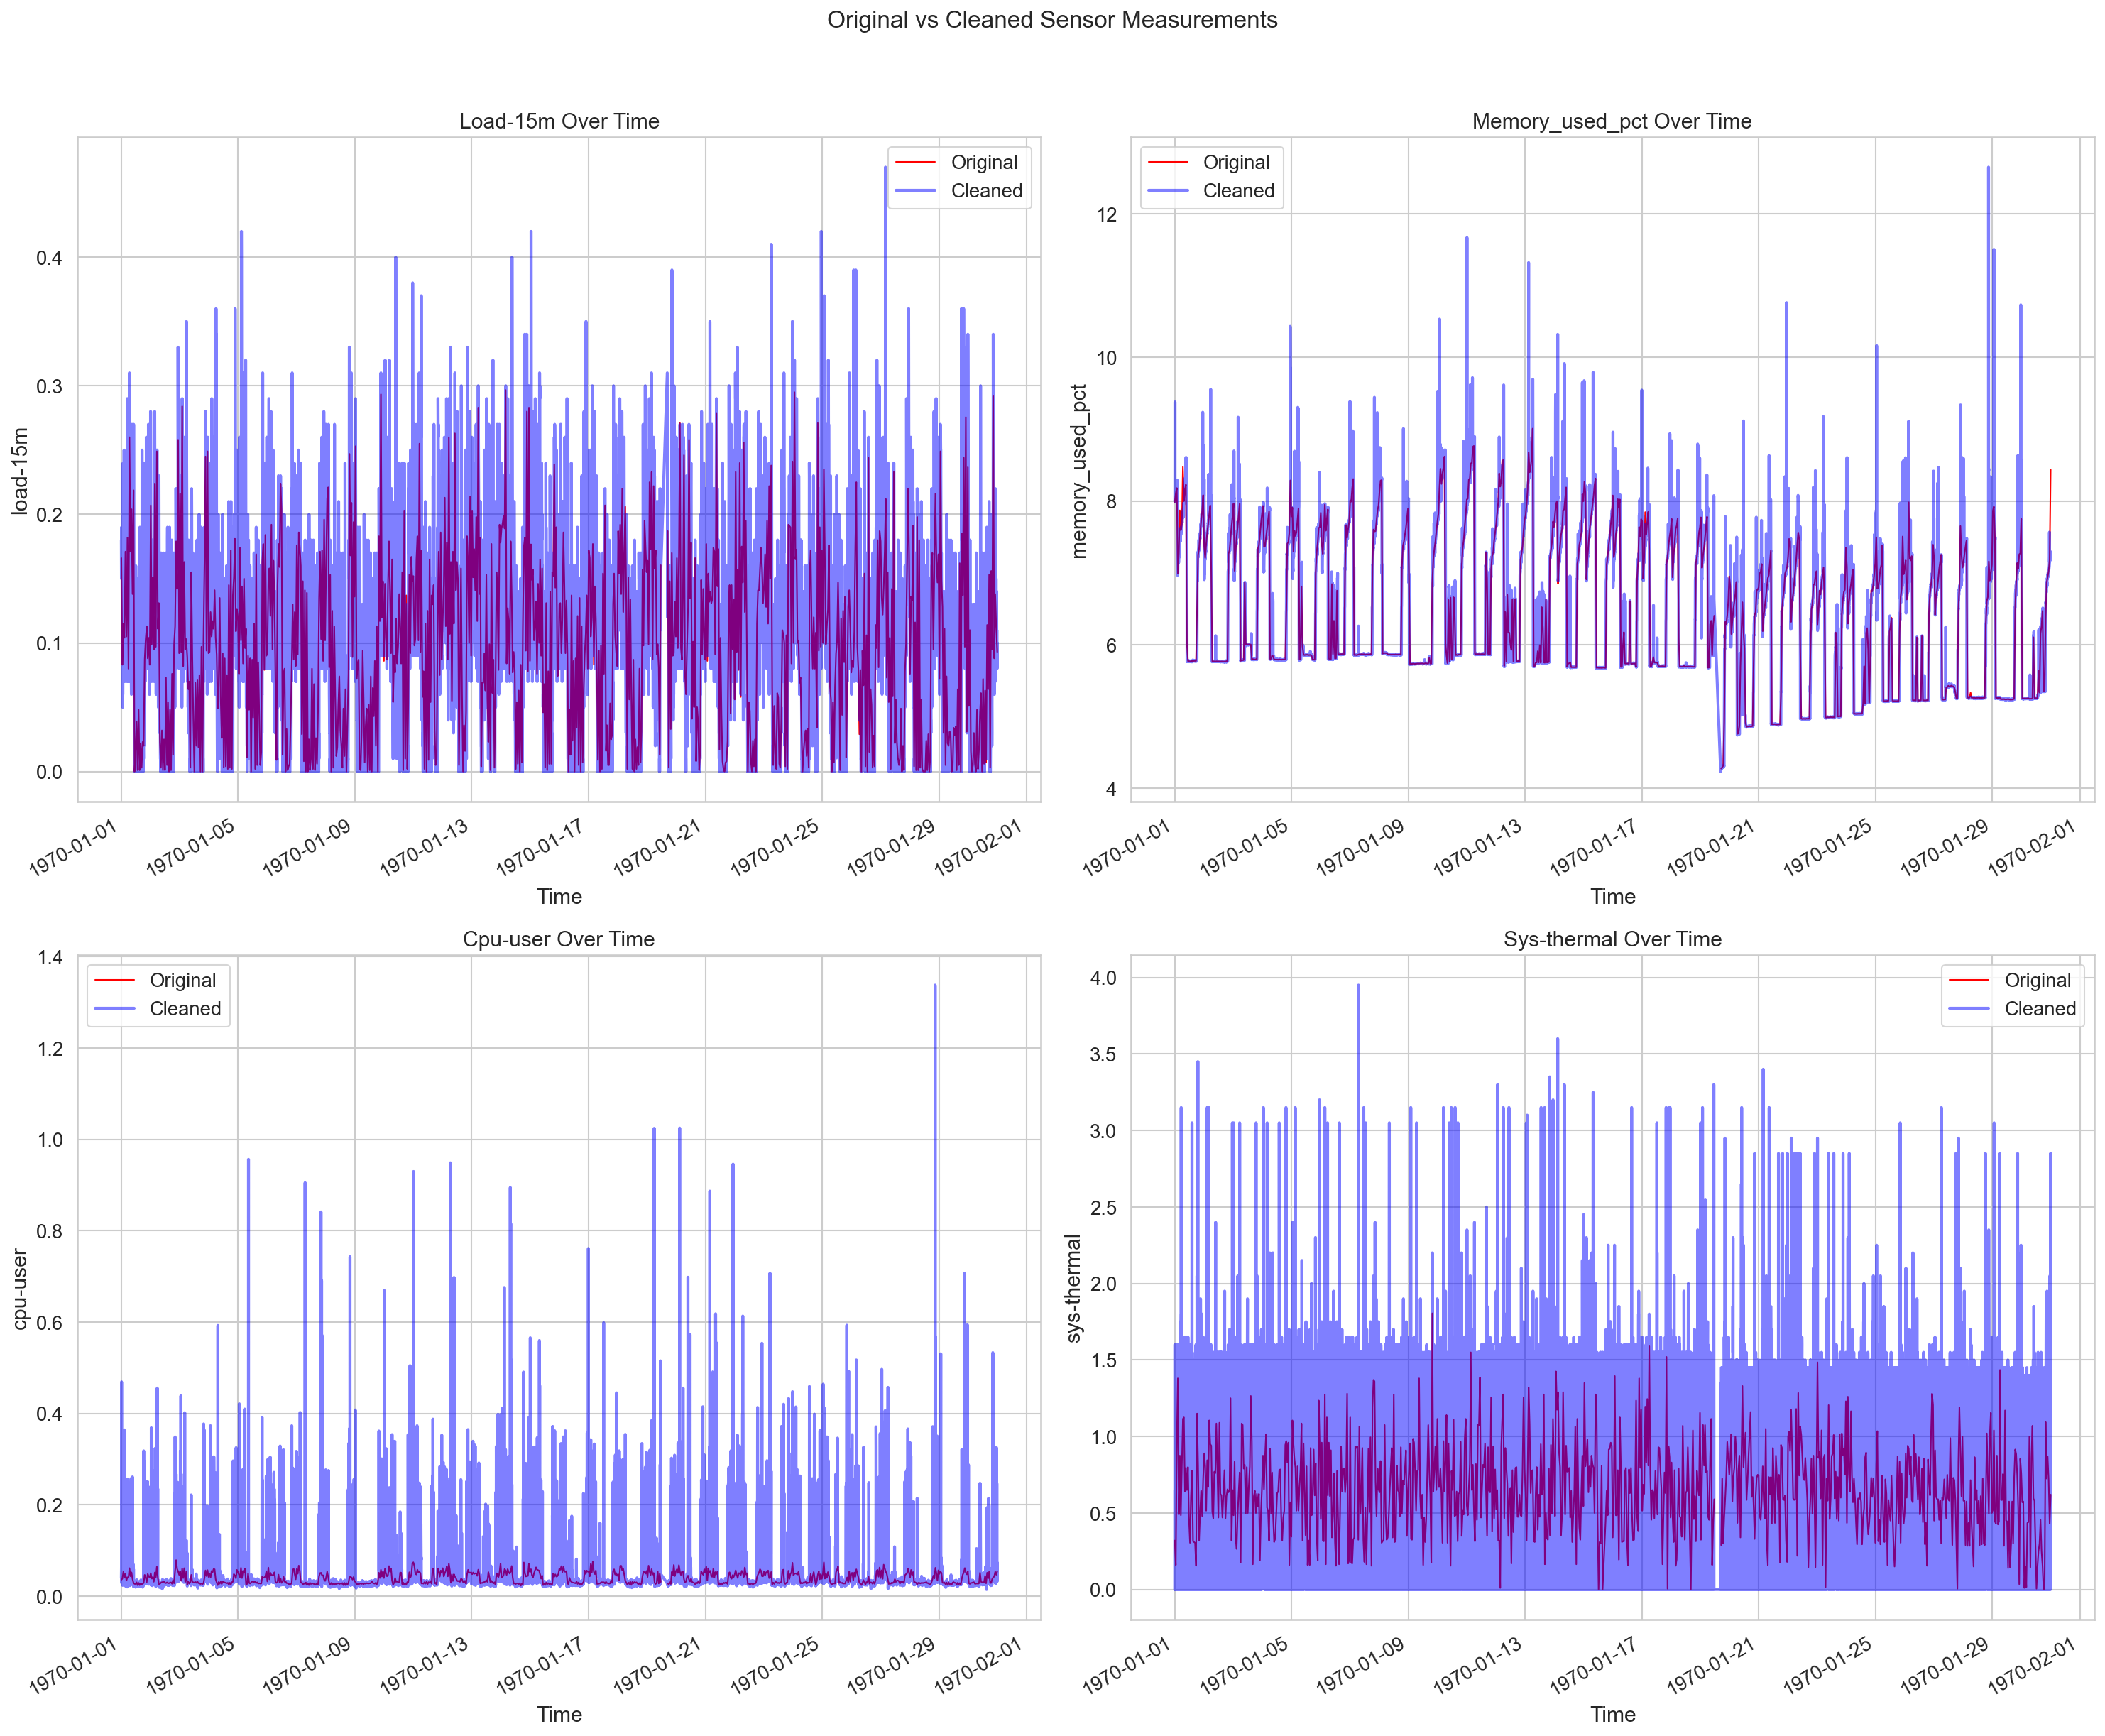

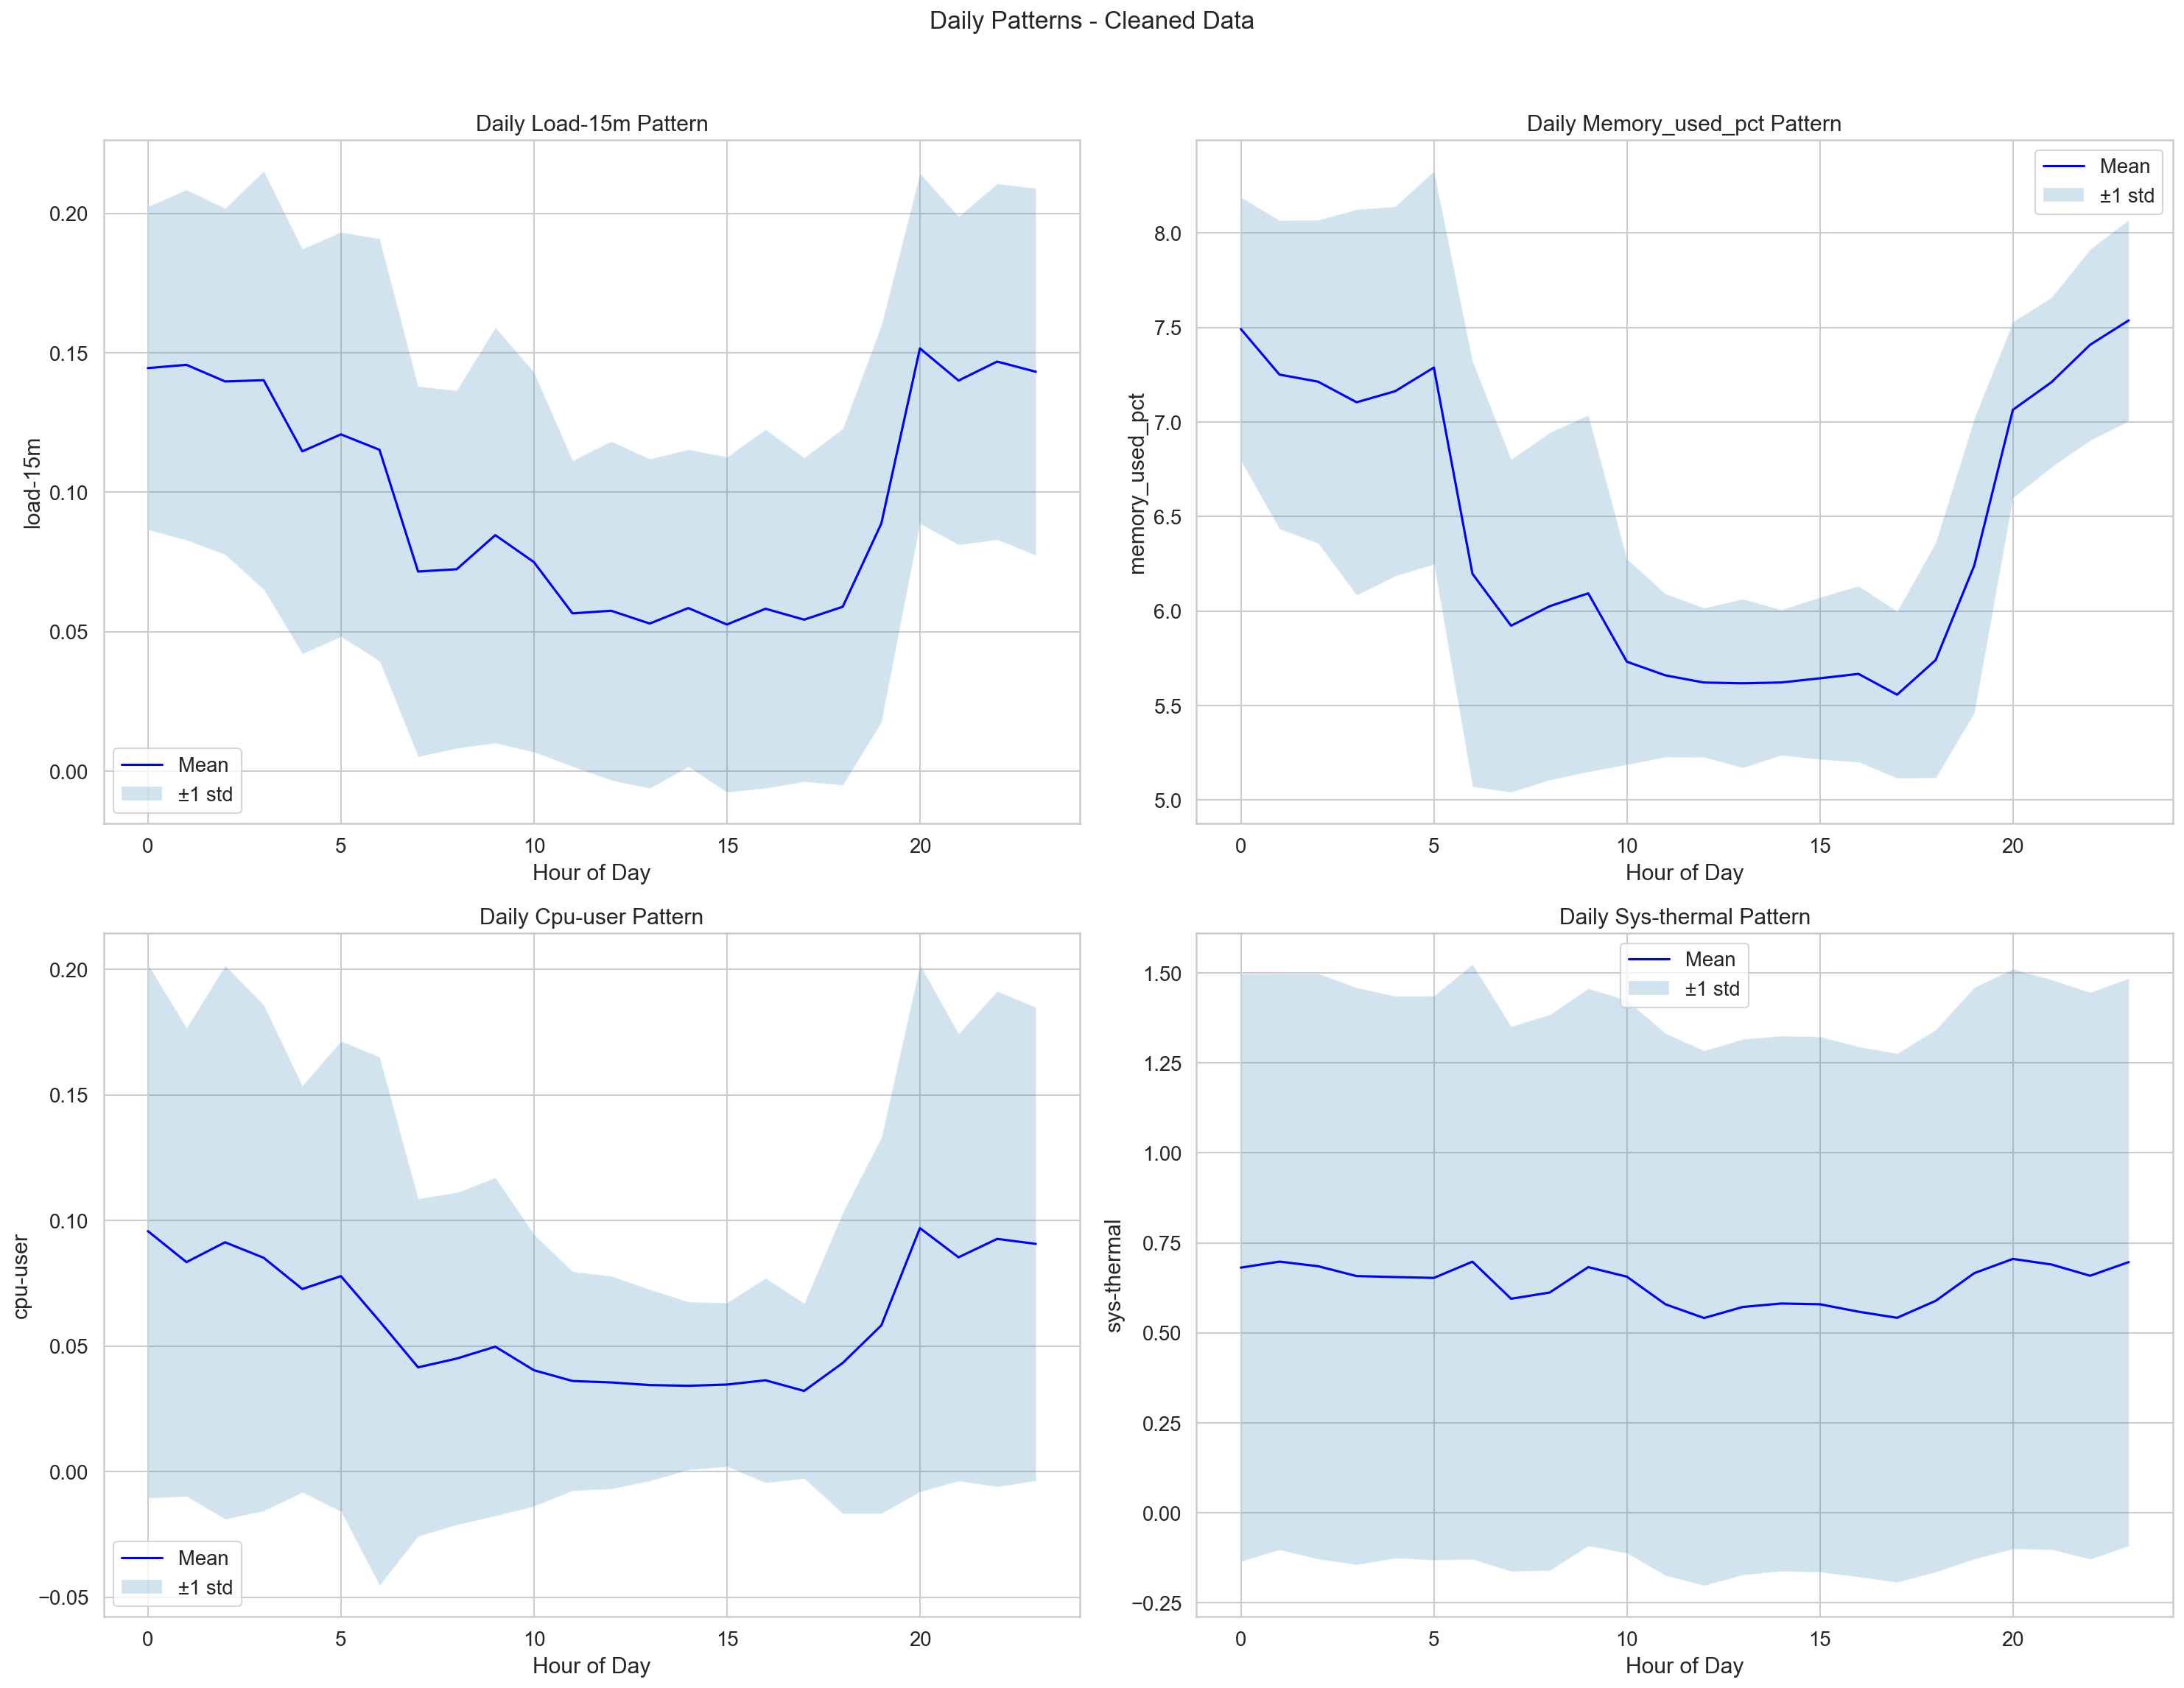

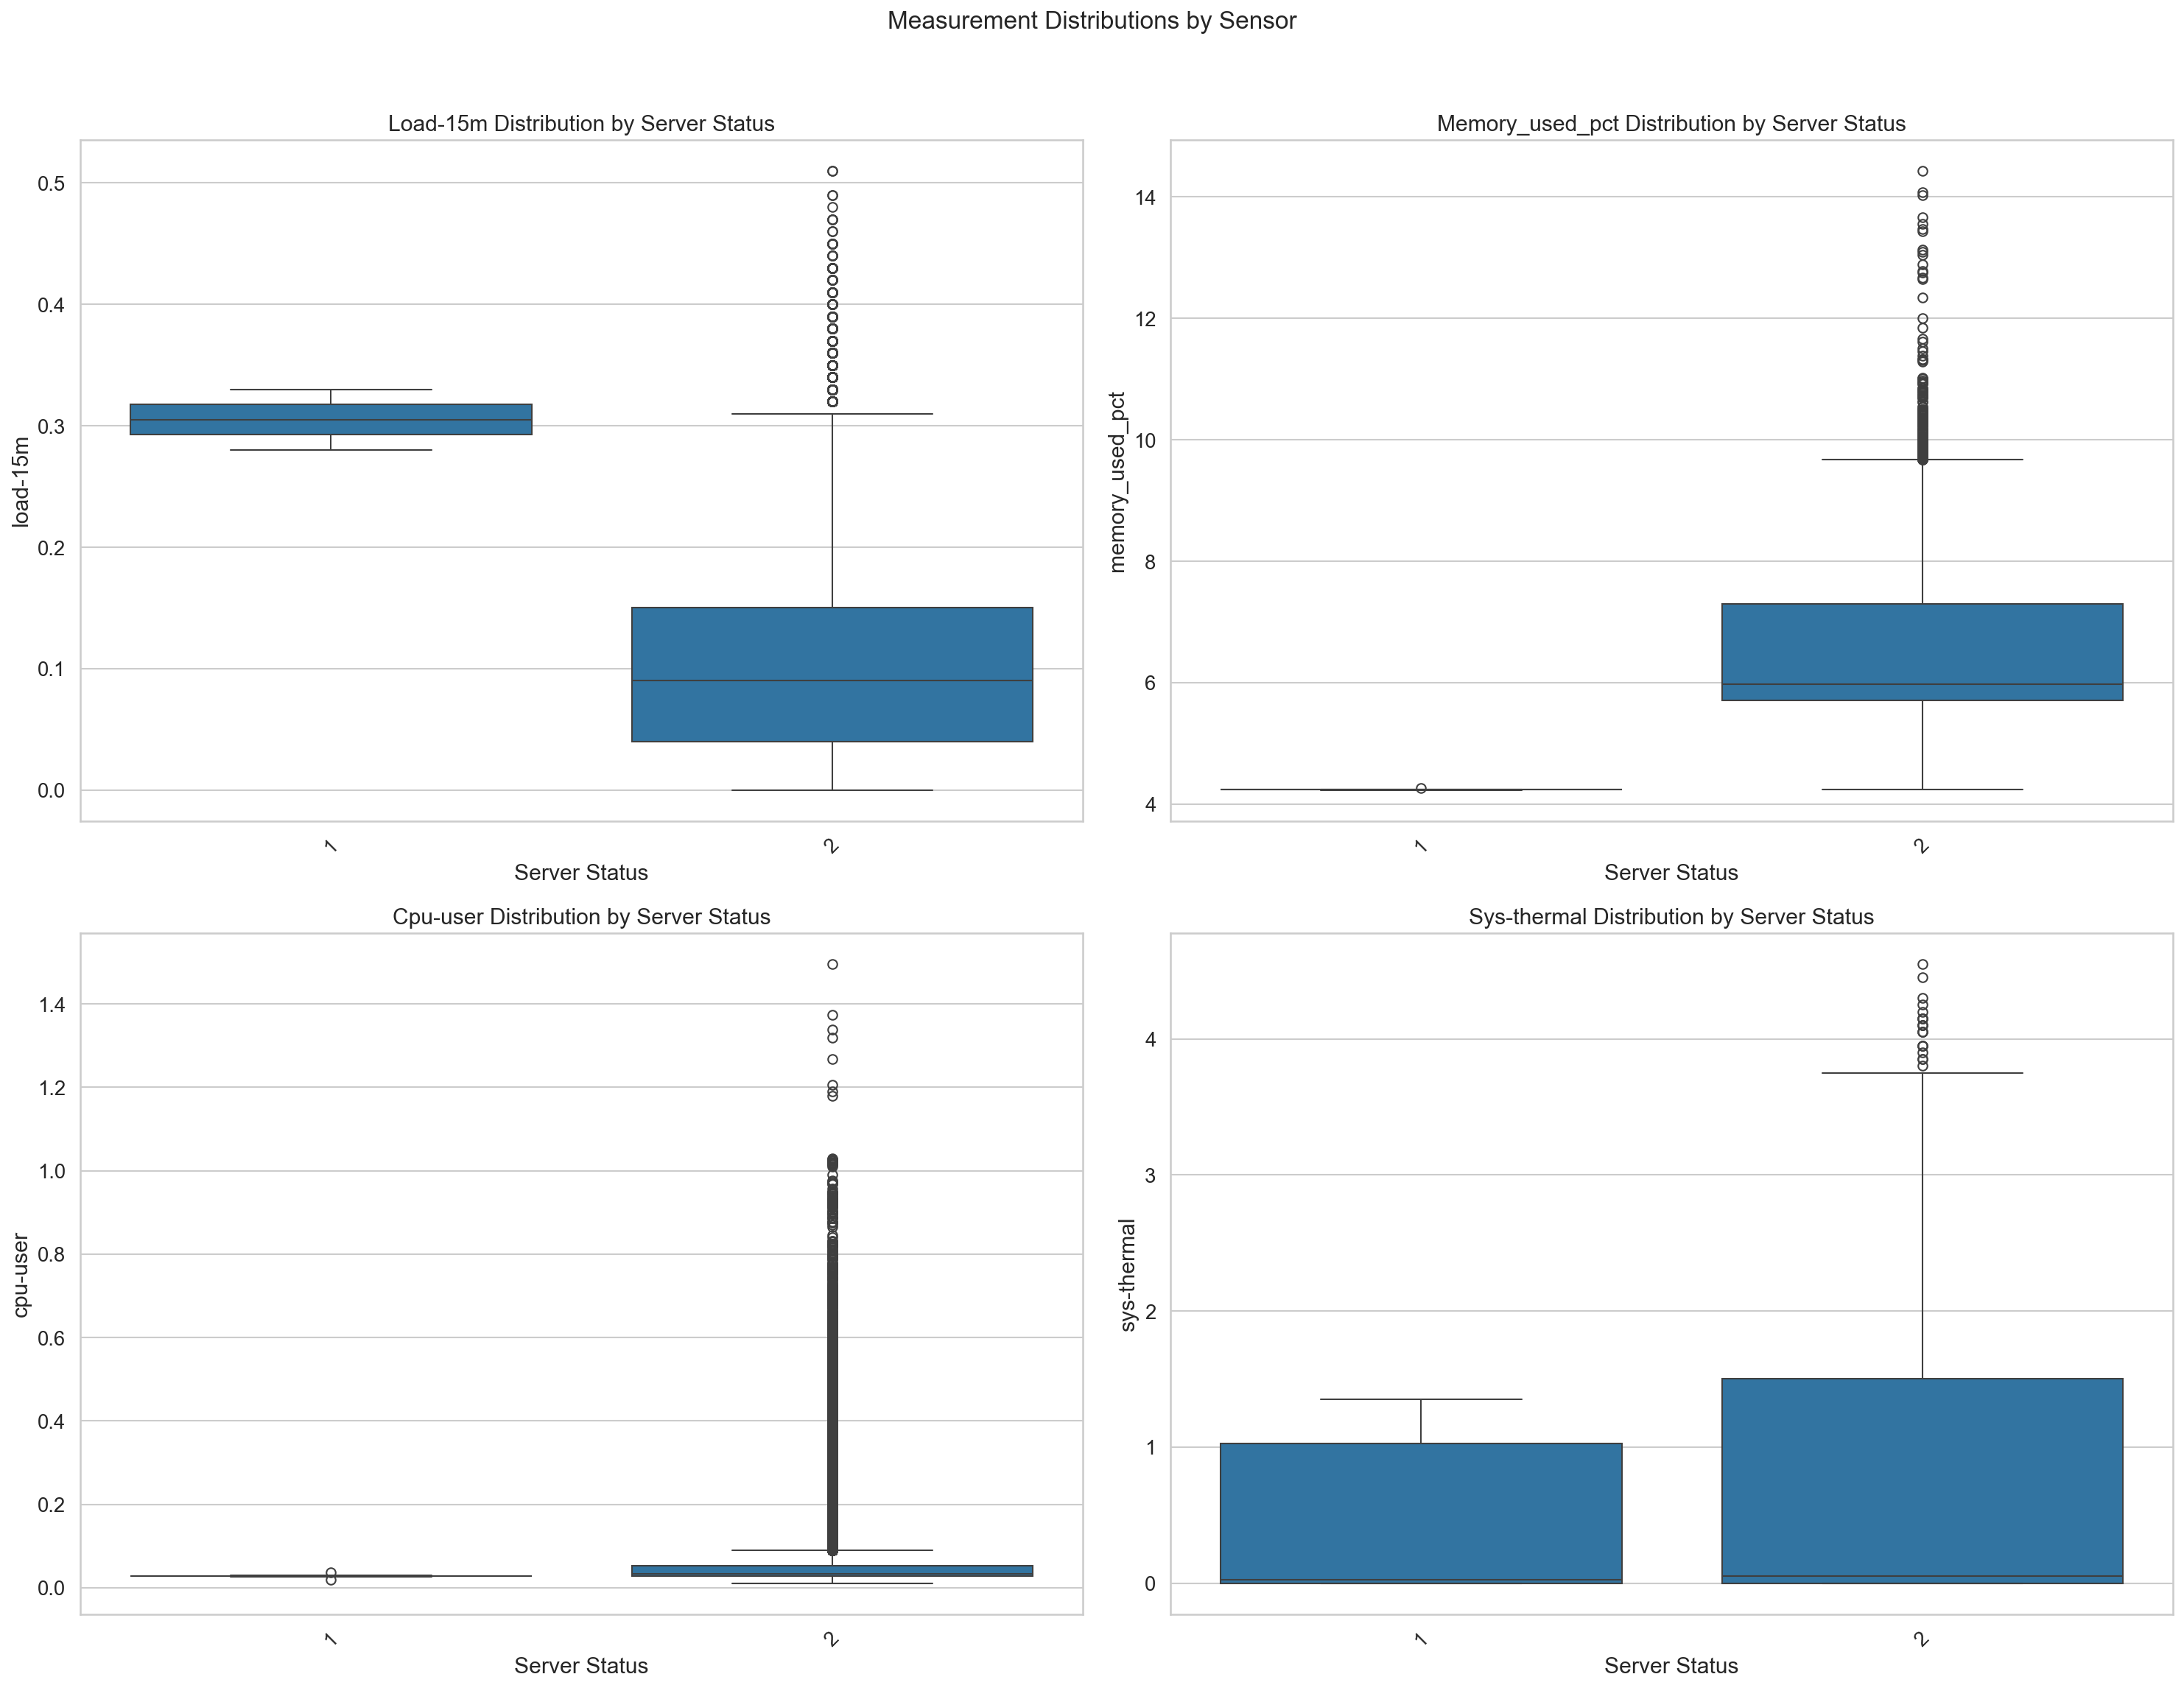

Creating scatter matrix...


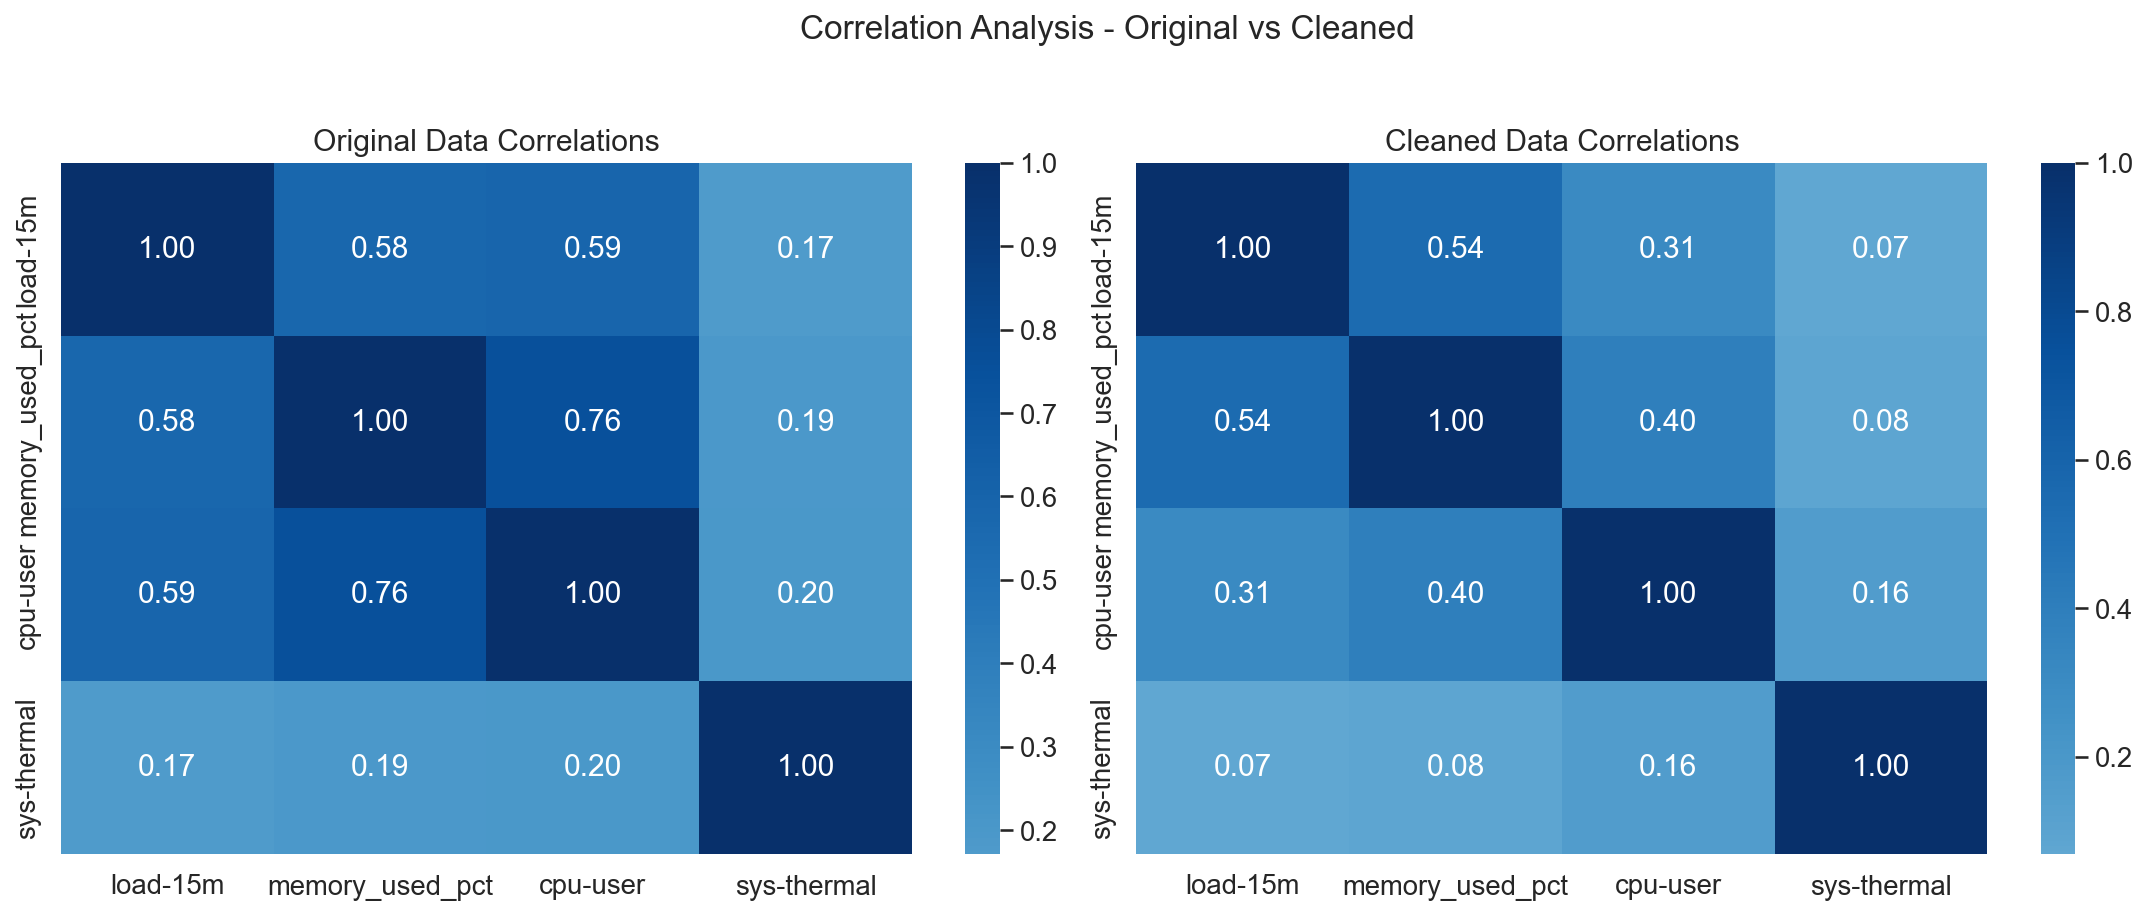

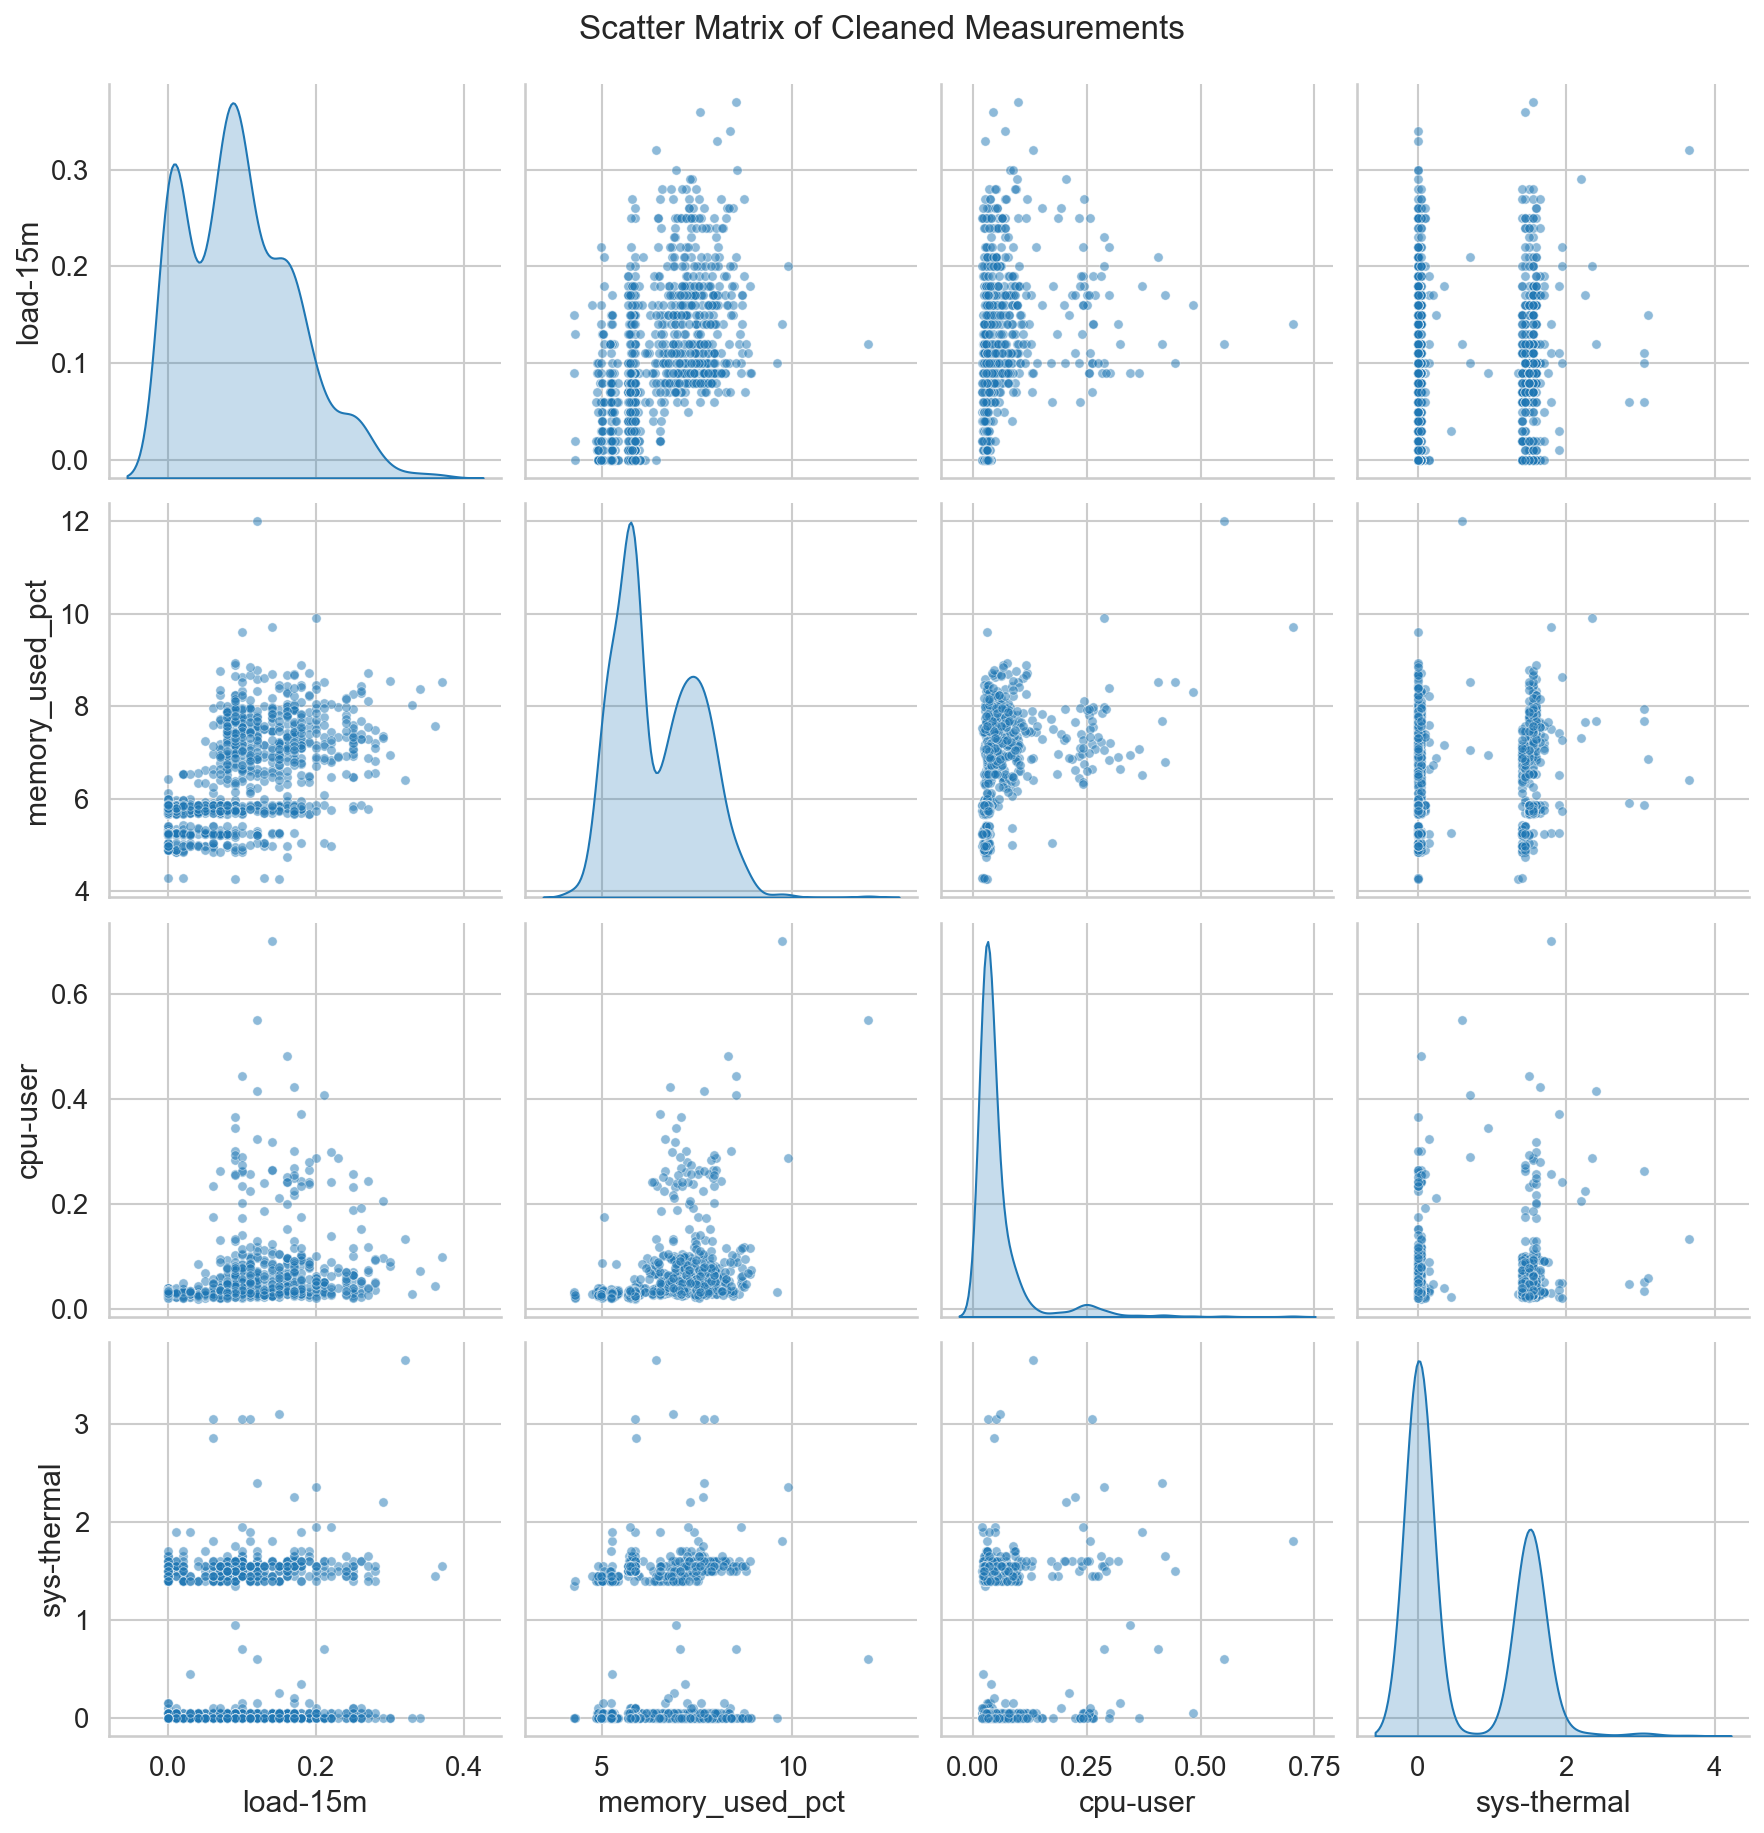

<Figure size 1800x1200 with 0 Axes>

In [ ]:
def compare_data_versions(df_original: pd.DataFrame,
                         df_cleaned: pd.DataFrame) -> tuple:
    """Compare original and cleaned data versions.
    
    Parameters
    ----------
    df_original : pd.DataFrame
        Original unprocessed data
    df_cleaned : pd.DataFrame
        Cleaned and processed data
        
    Returns
    -------
    tuple
        (figures, comparison_stats) containing:
        - Comparison visualizations
        - Statistics dictionary
    """
    # YOUR CODE HERE
        # 3. Create visualization plots
    print("\nCreating visualization plots...")
    measurements = ['load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal']

    # Plot 1: Original vs Cleaned Measurements
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('Original vs Cleaned Sensor Measurements', fontsize=16, y=1.02)

    for i, measurement in enumerate(measurements):
        row = i // 2
        col = i % 2
        
        # Plot original (sample every 10th point for better performance)
        df_original[measurement].iloc[::10].plot(
            ax=axes[row, col],
            alpha=1,
            label='Original',
            color='red',
            linewidth=1
        )
        
        # Plot cleaned (sample every 10th point)
        df_cleaned[measurement].iloc[::10].plot(
            ax=axes[row, col],
            alpha=0.5,
            label='Cleaned',
            color='blue',
            linewidth=2
        )
        
        axes[row, col].set_title(f'{measurement.capitalize()} Over Time')
        axes[row, col].set_xlabel('Time')
        axes[row, col].set_ylabel(measurement)
        axes[row, col].legend()
        axes[row, col].grid(True)

    plt.tight_layout()
    plt.show()

    # Plot 2: Daily Patterns
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle('Daily Patterns - Cleaned Data', fontsize=16, y=1.02)

    # Create hour column for grouping
    df_hour = df_cleaned.copy()
    df_hour['hour'] = df_hour.index.hour

    for i, measurement in enumerate(measurements):
        row = i // 2
        col = i % 2
        
        # Calculate hourly statistics
        hourly_stats = df_hour.groupby('hour')[measurement].agg(['mean', 'std'])
        
        # Plot mean with standard deviation
        axes[row, col].plot(hourly_stats.index, hourly_stats['mean'], 
                        'b-', label='Mean')
        axes[row, col].fill_between(
            hourly_stats.index,
            hourly_stats['mean'] - hourly_stats['std'],
            hourly_stats['mean'] + hourly_stats['std'],
            alpha=0.2,
            label='±1 std'
        )
        
        axes[row, col].set_title(f'Daily {measurement.capitalize()} Pattern')
        axes[row, col].set_xlabel('Hour of Day')
        axes[row, col].set_ylabel(measurement)
        axes[row, col].grid(True)
        axes[row, col].legend()

    plt.tight_layout()
    plt.show()

    # Plot 3: Sensor-wise Distributions
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle('Measurement Distributions by Sensor', fontsize=16, y=1.02)

    for i, measurement in enumerate(measurements):
        row = i // 2
        col = i % 2
        
        # Reset index for plotting
        df_plot = df_cleaned.reset_index()
        
        sns.boxplot(
            data=df_plot,
            x='server-up',
            y=measurement,
            ax=axes[row, col]
        )
        
        axes[row, col].set_title(f'{measurement.capitalize()} Distribution by Server Status')
        axes[row, col].set_xlabel('Server Status')
        axes[row, col].set_ylabel(measurement)
        axes[row, col].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Plot 4: Correlation Analysis
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Correlation Analysis - Original vs Cleaned', y=1.02, fontsize=16)

    # Original correlations
    sns.heatmap(
        df_original[measurements].corr(),
        annot=True,
        cmap='Blues',
        center=0,
        fmt='.2f',
        ax=ax1
    )
    ax1.set_title('Original Data Correlations')

    # Cleaned correlations
    sns.heatmap(
        df_cleaned[measurements].corr(),
        annot=True,
        cmap='Blues',
        center=0,
        fmt='.2f',
        ax=ax2
    )
    ax2.set_title('Cleaned Data Correlations')


    # Plot 5: Scatter Matrix
    print("Creating scatter matrix...")

    # Get data without duplicates by taking mean for each timestamp
    df_unique = df_cleaned.groupby(df_cleaned.index)[measurements].mean()

    # Sample from the unique data
    df_plot = df_unique.sample(n=min(1000, len(df_unique)), random_state=42)

    try:
        sns.pairplot(
            data=df_plot,
            diag_kind='kde',
            plot_kws={'alpha': 0.5, 's': 20},
            height=3
        )
        plt.suptitle('Scatter Matrix of Cleaned Measurements', y=1.02, fontsize=16)
        plt.show()
    except Exception as e:
        print(f"Warning: Could not create scatter matrix plot: {str(e)}")

    plt.tight_layout()
    plt.show()

compare_data_versions(df_original,df_cleaned)


## Task 2.3: Cleaned Data Analysis (24 points)

Based on your visualizations, analyze the system performance patterns.

1. Test Execution Patterns:\
a_) System load shows clear day/night testing cycles

2. System Performance:\
b_) High load periods (load-15m) align with increased Memory usage\
c_) High memory usage periods coincide with increased CPU usage rate of change\
d_) Temperature change rate increases during high system load periods

3. Resource Utilization:\
e_) Memory usage consistently increases at test start and gradually decreases towards test completion\
f_) System load stays within reasonable limits (<0.4) during normal operation

4. System Behavior:\
g_) Memory usage returns to idle state levels (around 5-6%) between test cycles\
h_) Load, memory, and CPU metrics collectively show clear patterns distinguishing between test execution and idle periods\


In [ ]:
# Your answers and reasoning below. For each statement, first set the boolean value 
# then explain your reasoning based on the visualizations.

# Test Execution Patterns
a_ = True
# Your reasoning here: Like stated at the start, tests are run over night. On daily patterns load increases during night and decreases during day

# System Performance
b_ = True
# Your reasoning here: Looking at the daily patterns, curves are similar. The correlation matrix also follows similar conclusion since the relation is 0.6.
#  And on scatter matrix, most of the points are grouped closely, which proves their relationship.

c_ = True
# Your reasoning here: Similar to the memory usage and load comparisson, memory usage and cpu usage rate do coincide

d_ = False
# Your reasoning here: Temperature stays pretty constant during the period. Scatter matrix shows a clear separation. It makes sense since the system probably has a cooling.

# Resource Utilization
e_ = True
# Your reasoning here: Yes, it would seem to me that test starts at 5PM so the memory usage increases, and at 5AM when test stops, a memory usage decreases

f_ = True
# Your reasoning here: Looking at the daily patterns, yes, it remains under 0.4. In range between 0.05 and 0.15

# System Behavior
g_ = True
# Your reasoning here: During 10AM and 5PM, a memory usage remains between 5.5-6%

h_ = True 
# Your reasoning here: With all this explanation above, this is a logical conclusion.

In [ ]:
# Test cell - DO NOT MODIFY
for var in ['a_', 'b_', 'c_', 'd_', 'e_', 'f_', 'g_', 'h_']:
    assert var in locals(), f"Missing answer for {var}"
    assert isinstance(locals()[var], bool), f"Answer for {var} must be True or False"

## Extra Tasks: Interactive Visualizations (15 Bonus Points)

Leverage Altair to create interactive visualizations based on the cleaned system performance data. Before you start, review the **Interactive Plotting** tutorial to familiarize yourself with Altair's capabilities for crafting interactive plots.

Feel free to experiment and design different types of interactive visualizations that effectively represent the data, in addition to the tasks described below.

**Possible visualization ideas:**

- **Interactive Time-Series Charts**: Plot CPU and memory usage over time with zoom and pan functionalities.
- **Scatter Plots with Tooltips**: Explore relationships between performance metrics by displaying detailed information on hover.
- **Heatmaps and Correlation Matrices**: Visualize correlations with interactive elements that highlight specific data points.
- **Combined Dashboards**: Create a dashboard featuring multiple interactive charts for a holistic view of system performance.

Be creative and innovative in your approach to make the visualizations both informative and engaging.

### ET1: Basic Interactive Time Series (5 points)
Create an interactive time series visualization that includes:
1. System load over time with zoom/pan capabilities
2. Tooltips showing metric values
3. Server status indicated by color

Hint:
```python

import altair as alt

# Enable the rendering of charts
alt.renderers.enable('default')
# Set a maximum number of rows for Altair
alt.data_transformers.enable('default', max_rows=None)

def create_basic_interactive(df):
    # Base chart with zoom
    chart = alt.Chart(df.reset_index()).mark_line().encode(
        x='datetime:T',
        y=alt.Y('cpu-user', 
                title='CPU Time Rate of Change (seconds)'),  # Updated title
        color=alt.Color('server-up:Q', 
                       scale=alt.Scale(scheme='redyellowgreen')),
        tooltip=['datetime:T', 
                alt.Tooltip('cpu-user', 
                           title='CPU Time Change'), 
                'server-up']
    ).interactive()
    
    return chart
```

Note: Make sure to install required packages:
```python
# Install packages if needed:
# pip install altair altair_saver vega_datasets
# or
# conda install -c conda-forge altair altair_saver vega_datasets

# altair_saver package - to allow saving visualizations.
# vega_datasets - to provide example datasets
# Note: Above two packages (altair_saver and vega_datasets) are not necessary here but relevant for the interactive tutorial.
```

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 



### ET2: Linked Views (5 points)
Create two linked interactive visualizations:
1. Load vs Memory usage scatter plot
2. Corresponding histogram of selected data points
3. Implement brushing to highlight points

Hint:
```python
def create_linked_views(df):
    # Create selection
    brush = alt.selection_interval()
    
    # Scatter plot
    scatter = alt.Chart(df).mark_point().encode(
        x='load-15m',
        y='memory_used_pct',
        color=alt.condition(brush, 'server-up:Q', alt.value('lightgray'))
    ).add_selection(brush)
    
    # Histogram for selected data
    hist = alt.Chart(df).mark_bar().encode(
        x='load-15m',
        y='count()'
    ).transform_filter(brush)
    
    return scatter & hist  # Stack vertically
```




In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### ET3: Advanced Dashboard (5 points)
Create a comprehensive dashboard with:
1. Time series with selectable time range
2. Metric comparison scatter plot
3. Summary statistics for selected period
4. Interactive filtering across all views

Points awarded for:
- Creative use of Altair features
- Effective interaction design
- Clear visual communication


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()